In [93]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [94]:
df = pd.ExcelFile('raw_data_file.xlsx')
print(df.sheet_names)
data = pd.read_excel('raw_data_file.xlsx', sheet_name='raw_data')
print(data.columns)


['raw_data', 'Lat_long(for ref)']
Index(['ID', 'Fulfillment Status', 'Accepts Marketing', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created Date', 'Lineitem quantity', 'Product', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing City', 'Billing Zip',
       'Billing Province', 'Shipping City', 'Shipping Zip',
       'Shipping Province', 'Risk Level', 'Source', 'Billing Province Name',
       'Shipping Province Name'],
      dtype='object')


In [95]:
print(data.dtypes)

ID                                      int64
Fulfillment Status                     object
Accepts Marketing                      object
Subtotal                              float64
Shipping                              float64
Taxes                                 float64
Total                                 float64
Discount Code                          object
Discount Amount                       float64
Shipping Method                        object
Created Date                   datetime64[ns]
Lineitem quantity                       int64
Product                                object
Lineitem price                          int64
Lineitem compare at price             float64
Lineitem sku                          float64
Lineitem requires shipping               bool
Lineitem taxable                         bool
Lineitem fulfillment status            object
Billing City                           object
Billing Zip                            object
Billing Province                  

In [96]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Optional: Display rows with any missing values
rows_with_missing_values = data[data.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Optional: Count total number of rows with missing values
num_rows_with_missing = len(rows_with_missing_values)
print(f"\nTotal number of rows with missing values: {num_rows_with_missing}")

Missing values in each column:
ID                                  0
Fulfillment Status               4992
Accepts Marketing                4992
Subtotal                         4992
Shipping                         4992
Taxes                            4992
Total                            4992
Discount Code                  129696
Discount Amount                  4992
Shipping Method                 10800
Created Date                        0
Lineitem quantity                   0
Product                             0
Lineitem price                      0
Lineitem compare at price        5120
Lineitem sku                   135072
Lineitem requires shipping          0
Lineitem taxable                    0
Lineitem fulfillment status         0
Billing City                     5104
Billing Zip                      5088
Billing Province                 5008
Shipping City                    5104
Shipping Zip                     5056
Shipping Province                5040
Risk Level         

In [97]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)


ID                               0.000000
Fulfillment Status               3.695807
Accepts Marketing                3.695807
Subtotal                         3.695807
Shipping                         3.695807
Taxes                            3.695807
Total                            3.695807
Discount Code                   96.019900
Discount Amount                  3.695807
Shipping Method                  7.995736
Created Date                     0.000000
Lineitem quantity                0.000000
Product                          0.000000
Lineitem price                   0.000000
Lineitem compare at price        3.790571
Lineitem sku                   100.000000
Lineitem requires shipping       0.000000
Lineitem taxable                 0.000000
Lineitem fulfillment status      0.000000
Billing City                     3.778725
Billing Zip                      3.766880
Billing Province                 3.707652
Shipping City                    3.778725
Shipping Zip                     3

In [25]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

unique count
ID                                 135072
Fulfillment Status                      2
Accepts Marketing                       2
Subtotal                                9
Shipping                                1
Taxes                                  16
Total                                  10
Discount Code                          73
Discount Amount                         5
Shipping Method                         1
Created Date                          202
Lineitem quantity                       5
Product                                63
Lineitem price                          1
Lineitem compare at price               1
Lineitem sku                            0
Lineitem requires shipping              1
Lineitem taxable                        2
Lineitem fulfillment status             2
Billing City                          712
Billing Zip                          1172
Billing Province                       35
Shipping City                         711
Shipping Zip                         1173
Shipping Province                      34
Risk Level                              2
Source                                  2
Billing Province Name                  35
Shipping Province Name                 34

In [98]:
data = data.drop(columns=['Fulfillment Status',  'Shipping',
       'Taxes',   'Shipping Method',
        'Lineitem price', 'Accepts Marketing',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Source',
        'Risk Level' 
        ])
data.head(3)

ID  Subtotal   Total Discount Code  Discount Amount Created Date  \
0   1    1999.0  1999.0           NaN              0.0   2020-12-05   
1   2    1999.0  1999.0           NaN              0.0   2020-12-05   
2   3    1999.0  1999.0           NaN              0.0   2020-12-05   

   Lineitem quantity                          Product Billing City  \
0                  1    The Ultimate Leggings - L-una    Bengaluru   
1                  1  The Ultimate Leggings - S-elene      Gurgaon   
2                  1    The Ultimate Leggings - L-una    Bangalore   

  Billing Zip Billing Province Shipping City Shipping Zip Shipping Province  \
0     '560064               KA     Bengaluru      '560064                KA   
1     '122001               HR       Gurgaon      '122001                HR   
2     '560072               KA     Bangalore      '560072                KA   

  Billing Province Name Shipping Province Name  
0             Karnataka              Karnataka  
1               Haryana                Haryana  
2             Karnataka              Karnataka

In [99]:
unique_discount_codes = data['Discount Code'].unique()
print("Unique Discount Codes:")
print(unique_discount_codes)

Unique Discount Codes:
[nan 'C201108-DL4MNP2' 'C201108-WQJLQT2' 'C201108-QDDTCNP'
 'C201108-CEWF9C2' 'C201116-N92HLP2' 'C201116-DYQJ4JW' 'C201204-RCAKD7T'
 'C201204-VELL6LR' 'Custom discount' 'influencer sample' 'C201204-ZJZPTKX'
 'C201204-LEQJ6AF' 'C201204-2YJL6PV' 'C201204-YM2CQVC' 'C201204-LVJWFYE'
 'C201204-3H2XC3J' 'C201204-3QCQ2RR' 'C201206-MTGLTHY' 'C201206-FZLY4KT'
 'C201206-6GDKFXC' 'C201209-AGYL9E3' 'C201209-KWGJTGV' 'C201209-WPMYDX4'
 'C201209-NAGYVMM' 'C201209-LV4RDMQ' 'C210118-4RANHJ4' 'C210520-XZYGM39'
 'C210520-XPTPC2Z' 'C210520-AZRJA4C' 'C210520-HVXZ94X' 'exchange'
 'C210520-AD7HX9Q' 'prepaid RTO  resend' 'C210520-DJX2LRA'
 'C210520-4TRFKJN' 'C210520-XPLNEMD' 'Influencer sample' 'EXchange'
 'Exchange' 'C210522-RGG9QX4' 'C210522-RVGZNXY' 'C210118-FYJDGLX'
 'C210522-KKQFRRD' 'C210522-GDZKRAX' 'C210522-KYAYCN2' 'C210522-PJH7PTQ'
 'Influencer Sample' 'Exvhange' 'C210522-QGG4VZP' 'C210522-2ECKDGY'
 'C210522-AWLAHAN' 'C210523-X4YWLFC' 'C210522-NLPL6RG' 'PREPAID RTO'
 'C210523

In [100]:
# Define a list of discount codes to drop
codes_to_drop = ['EXchange', 'Exchange', 'exchange', 'influencer sample', 'prepaid RTO  resend']

# Filter out rows with those discount codes
filtered_data = data[~data['Discount Code'].isin(codes_to_drop)]

# Print the resulting DataFrame or check the first few rows
print(filtered_data.head())


   ID  Subtotal   Total Discount Code  Discount Amount Created Date  \
0   1    1999.0  1999.0           NaN              0.0   2020-12-05   
1   2    1999.0  1999.0           NaN              0.0   2020-12-05   
2   3    1999.0  1999.0           NaN              0.0   2020-12-05   
3   4    1999.0  1999.0           NaN              0.0   2020-12-05   
4   5    1999.0  1999.0           NaN              0.0   2020-12-05   

   Lineitem quantity                          Product Billing City  \
0                  1    The Ultimate Leggings - L-una    Bengaluru   
1                  1  The Ultimate Leggings - S-elene      Gurgaon   
2                  1    The Ultimate Leggings - L-una    Bangalore   
3                  1    The Ultimate Leggings - M-aia   Bengaluru    
4                  1  The Ultimate Leggings - S-elene    BENGALURU   

  Billing Zip Billing Province Shipping City Shipping Zip Shipping Province  \
0     '560064               KA     Bengaluru      '560064                

In [101]:
data = data.drop(columns=['Discount Code',])
data.head(3)

ID  Subtotal   Total  Discount Amount Created Date  Lineitem quantity  \
0   1    1999.0  1999.0              0.0   2020-12-05                  1   
1   2    1999.0  1999.0              0.0   2020-12-05                  1   
2   3    1999.0  1999.0              0.0   2020-12-05                  1   

                           Product Billing City Billing Zip Billing Province  \
0    The Ultimate Leggings - L-una    Bengaluru     '560064               KA   
1  The Ultimate Leggings - S-elene      Gurgaon     '122001               HR   
2    The Ultimate Leggings - L-una    Bangalore     '560072               KA   

  Shipping City Shipping Zip Shipping Province Billing Province Name  \
0     Bengaluru      '560064                KA             Karnataka   
1       Gurgaon      '122001                HR               Haryana   
2     Bangalore      '560072                KA             Karnataka   

  Shipping Province Name  
0              Karnataka  
1                Haryana  
2              Karnataka

In [102]:
# Count rows with missing values
rows_with_missing = data.isnull().any(axis=1).sum()
total_rows = len(data)
missing_row_percentage = (rows_with_missing / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Rows with missing values: {rows_with_missing}")
print(f"Percentage of rows with missing values: {missing_row_percentage:.2f}%")


Total rows: 135072
Rows with missing values: 5168
Percentage of rows with missing values: 3.83%


In [103]:
# Drop rows where critical columns have missing values
critical_columns = ['Subtotal', 'Total', 'Discount Amount', 
                    'Billing City','Billing Zip','Billing Province',
                    'Shipping City','Shipping Zip',	'Shipping Province',
                    'Billing Province Name',	'Shipping Province Name']
n1_data = data.dropna(subset=critical_columns)


In [104]:
n1_data.head()

ID  Subtotal   Total  Discount Amount Created Date  Lineitem quantity  \
0   1    1999.0  1999.0              0.0   2020-12-05                  1   
1   2    1999.0  1999.0              0.0   2020-12-05                  1   
2   3    1999.0  1999.0              0.0   2020-12-05                  1   
3   4    1999.0  1999.0              0.0   2020-12-05                  1   
4   5    1999.0  1999.0              0.0   2020-12-05                  1   

                           Product Billing City Billing Zip Billing Province  \
0    The Ultimate Leggings - L-una    Bengaluru     '560064               KA   
1  The Ultimate Leggings - S-elene      Gurgaon     '122001               HR   
2    The Ultimate Leggings - L-una    Bangalore     '560072               KA   
3    The Ultimate Leggings - M-aia   Bengaluru      '560102               KA   
4  The Ultimate Leggings - S-elene    BENGALURU     '560102               KA   

  Shipping City Shipping Zip Shipping Province Billing Province Name  \
0     Bengaluru      '560064                KA             Karnataka   
1       Gurgaon      '122001                HR               Haryana   
2     Bangalore      '560072                KA             Karnataka   
3    Bengaluru       '560102                KA             Karnataka   
4     BENGALURU      '560102                KA             Karnataka   

  Shipping Province Name  
0              Karnataka  
1                Haryana  
2              Karnataka  
3              Karnataka  
4              Karnataka

In [105]:
n1_data=n1_data.drop(columns=['Subtotal',])
n1_data.head()

ID   Total  Discount Amount Created Date  Lineitem quantity  \
0   1  1999.0              0.0   2020-12-05                  1   
1   2  1999.0              0.0   2020-12-05                  1   
2   3  1999.0              0.0   2020-12-05                  1   
3   4  1999.0              0.0   2020-12-05                  1   
4   5  1999.0              0.0   2020-12-05                  1   

                           Product Billing City Billing Zip Billing Province  \
0    The Ultimate Leggings - L-una    Bengaluru     '560064               KA   
1  The Ultimate Leggings - S-elene      Gurgaon     '122001               HR   
2    The Ultimate Leggings - L-una    Bangalore     '560072               KA   
3    The Ultimate Leggings - M-aia   Bengaluru      '560102               KA   
4  The Ultimate Leggings - S-elene    BENGALURU     '560102               KA   

  Shipping City Shipping Zip Shipping Province Billing Province Name  \
0     Bengaluru      '560064                KA             Karnataka   
1       Gurgaon      '122001                HR               Haryana   
2     Bangalore      '560072                KA             Karnataka   
3    Bengaluru       '560102                KA             Karnataka   
4     BENGALURU      '560102                KA             Karnataka   

  Shipping Province Name  
0              Karnataka  
1                Haryana  
2              Karnataka  
3              Karnataka  
4              Karnataka

In [106]:
n1_data=n1_data.drop(columns=['Billing City','Billing Zip', 'Billing Province', ])
n1_data.head()

ID   Total  Discount Amount Created Date  Lineitem quantity  \
0   1  1999.0              0.0   2020-12-05                  1   
1   2  1999.0              0.0   2020-12-05                  1   
2   3  1999.0              0.0   2020-12-05                  1   
3   4  1999.0              0.0   2020-12-05                  1   
4   5  1999.0              0.0   2020-12-05                  1   

                           Product Shipping City Shipping Zip  \
0    The Ultimate Leggings - L-una     Bengaluru      '560064   
1  The Ultimate Leggings - S-elene       Gurgaon      '122001   
2    The Ultimate Leggings - L-una     Bangalore      '560072   
3    The Ultimate Leggings - M-aia    Bengaluru       '560102   
4  The Ultimate Leggings - S-elene     BENGALURU      '560102   

  Shipping Province Billing Province Name Shipping Province Name  
0                KA             Karnataka              Karnataka  
1                HR               Haryana                Haryana  
2                KA             Karnataka              Karnataka  
3                KA             Karnataka              Karnataka  
4                KA             Karnataka              Karnataka

In [34]:
n1_data=n1_data.drop(columns=['Billing Province Name', ])
n1_data.head()

ID   Total  Discount Amount Created Date  Lineitem quantity  \
0   1  1999.0              0.0   2020-12-05                  1   
1   2  1999.0              0.0   2020-12-05                  1   
2   3  1999.0              0.0   2020-12-05                  1   
3   4  1999.0              0.0   2020-12-05                  1   
4   5  1999.0              0.0   2020-12-05                  1   

                           Product Shipping City Shipping Zip  \
0    The Ultimate Leggings - L-una     Bengaluru      '560064   
1  The Ultimate Leggings - S-elene       Gurgaon      '122001   
2    The Ultimate Leggings - L-una     Bangalore      '560072   
3    The Ultimate Leggings - M-aia    Bengaluru       '560102   
4  The Ultimate Leggings - S-elene     BENGALURU      '560102   

  Shipping Province Shipping Province Name  
0                KA              Karnataka  
1                HR                Haryana  
2                KA              Karnataka  
3                KA              Karnataka  
4                KA              Karnataka

In [107]:
num_unique_cities = n1_data['Shipping City'].nunique()
print("Number of unique cities:", num_unique_cities)

Number of unique cities: 711


In [108]:
test =n1_data


In [109]:
# Extract first 4 digits of Shipping Zip as Region Code
# Convert all Shipping City names to lowercase
test['Shipping City'] = test['Shipping City'].str.lower()

# Optionally, display the unique values in Shipping City to confirm
print(test['Shipping City'].unique())

test['Region Code'] = test['Shipping Zip'].astype(str).str[:4]

# Get the most frequent Shipping City for each Region Code
main_city_map = (
    test.groupby('Region Code')['Shipping City']  # Use test instead of data for consistency
    .agg(lambda x: x.value_counts().idxmax())    # Find most frequent city
    .to_dict()                                   # Convert to dictionary for mapping
)

# Add the Main City column to the test DataFrame
test['Main City'] = test['Region Code'].map(main_city_map)

# Display the updated DataFrame (optional)
print(test[['Region Code', 'Shipping City', 'Main City']].head())



['bengaluru' 'gurgaon' 'bangalore' 'bengaluru ' 'salem ' 'bangalore '
 'bhopal' 'visakhapatnam' 'gurugram' 'ranchi' 'pune' 'ahmedabad '
 'hyderabad' 'vizag' 'mumbai' 'calcutta' 'gurgoan' 'new delhi' 'jalore'
 'ulsoor' 'noida' 'delhi' 'surat' 'kolkata' 'greater noida' 'mumbai '
 'chandhigaru' 'ambarnath east ' 'bagalore' 'howrah' 'ahmedabad' 'khanvel'
 'jaipur' 'jabalpur' 'gandhinagar' 'lucknow' 'mangalore' 'new delhi '
 'defence officers apartment dwarka , new delhi' 'rajkot' 'ambernath'
 'thane' 'aurangabad ' 'digboi' 'north west delhi' 'dehradun' 'ulhasnagar'
 'kamothe, navi mumbai ' 'ludhianaâ€™s' 'margao ' 'margao' 'sangli'
 'moradabad' 'ajmer' 'chennai' 'balangir' 'ludhiana' 'sagar' 'akola'
 'bhatapara ' 'mysuru' 'mandla' 'coimbatore' 'faridabad' 'thane '
 'new floornew delhi' 'udaipur' 'delhi ' 'bengaluru (karnataka)' 'navalur'
 'guwahati' 'mulund' 'vadodara west' 'navi mumbai' 'gautam buddha nagar'
 'delhi north' 'dhule' 'bangalorr' 'thane west' 'narsipatnam' 'mysore'
 'raichur'

In [113]:
test.head()

ID   Total  Discount Amount Created Date  Lineitem quantity  \
0   1  1999.0              0.0   2020-12-05                  1   
1   2  1999.0              0.0   2020-12-05                  1   
2   3  1999.0              0.0   2020-12-05                  1   
3   4  1999.0              0.0   2020-12-05                  1   
4   5  1999.0              0.0   2020-12-05                  1   

                           Product Shipping City Shipping Zip  \
0    The Ultimate Leggings - L-una     bengaluru      '560064   
1  The Ultimate Leggings - S-elene       gurgaon      '122001   
2    The Ultimate Leggings - L-una     bangalore      '560072   
3    The Ultimate Leggings - M-aia    bengaluru       '560102   
4  The Ultimate Leggings - S-elene     bengaluru      '560102   

  Shipping Province Billing Province Name Shipping Province Name Region Code  \
0                KA             Karnataka              Karnataka        '560   
1                HR               Haryana                Haryana        '122   
2                KA             Karnataka              Karnataka        '560   
3                KA             Karnataka              Karnataka        '560   
4                KA             Karnataka              Karnataka        '560   

   Main City  
0  bangalore  
1    gurgaon  
2  bangalore  
3  bangalore  
4  bangalore

In [111]:
num_unique_cities = test['Main City'].nunique()
print("Number of unique cities:", num_unique_cities)

Number of unique cities: 226


In [112]:
test.to_excel('test_data.xlsx', index=False)

In [115]:
test['Created Date'] = pd.to_datetime(test['Created Date'])
test.set_index('Created Date', inplace=True)

In [116]:
monthly_sales = test['Total'].resample('ME').sum()
weekly_data = test['Total'].resample('W-SUN').sum()
print(weekly_data.head(3))

Created Date
2020-12-06     287856.0
2020-12-13    2267664.0
2020-12-20    3706944.0
Freq: W-SUN, Name: Total, dtype: float64


In [117]:
weekly_orders = test['ID'].resample('W-SUN').count()
weekly_aov = weekly_data / weekly_orders
print(weekly_aov)

Created Date
2020-12-06    1999.000000
2020-12-13    2024.700000
2020-12-20    2087.243243
2020-12-27    2171.636364
2021-01-03    1999.000000
2021-01-10    2069.333333
2021-01-17    2685.323333
2021-01-24    2054.527778
2021-01-31    2074.911392
2021-02-07    2028.215385
2021-02-14    2056.442529
2021-02-21    2057.050505
2021-02-28    2048.350000
2021-03-07    2107.361386
2021-03-14    2069.166667
2021-03-21    2103.844898
2021-03-28    2072.451163
2021-04-04    2111.314433
2021-04-11    2149.867925
2021-04-18    2048.975000
2021-04-25    2094.190476
2021-05-02    2163.865979
2021-05-09    2094.952000
2021-05-16    1997.863636
2021-05-23    2085.011952
2021-05-30    2045.958730
2021-06-06    2048.201799
2021-06-13    1996.647059
2021-06-20    2126.599424
2021-06-27    2177.437853
2021-07-04    1992.846154
Freq: W-SUN, dtype: float64


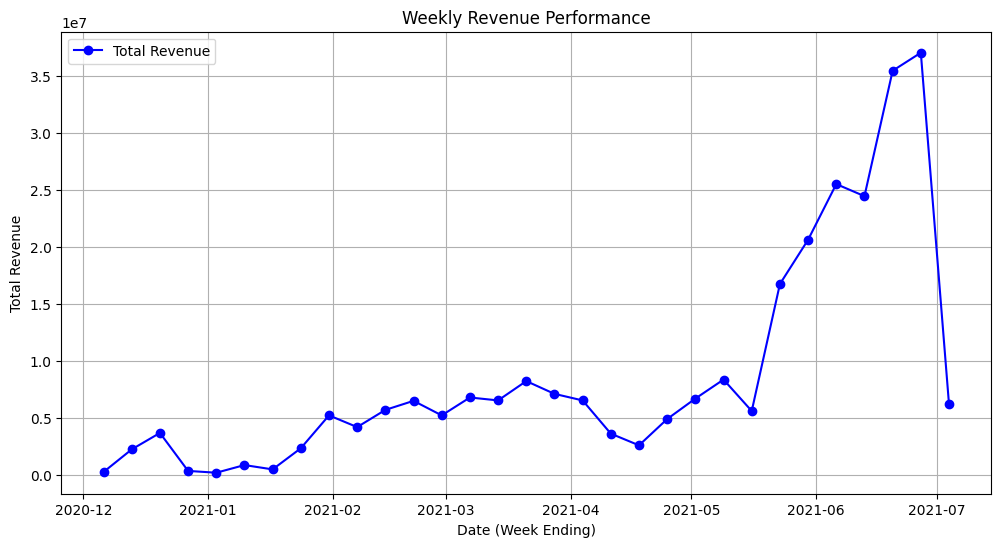

In [118]:
import matplotlib.pyplot as plt

# Ensure 'Total' is numeric
test['Total'] = pd.to_numeric(test['Total'], errors='coerce')

# Resample to weekly revenue (Sunday as the end of the week)
weekly_revenue = test['Total'].resample('W').sum()

# Plotting the weekly revenue
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o', color='blue', linestyle='-', label='Total Revenue')
plt.title('Weekly Revenue Performance')
plt.xlabel('Date (Week Ending)')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend()
plt.show()

Weeks with Revenue Spikes:
Created Date
2020-12-13    687.777222
2020-12-20     63.469720
2021-01-10    299.285357
2021-01-24    359.057072
2021-01-31    121.621622
2021-02-14     35.708922
2021-04-25     87.804878
2021-05-02     36.363636
2021-05-23    197.669101
2021-06-20     44.935136
Name: Total, dtype: float64

Weeks with Revenue Dips:
Created Date
2020-12-27   -89.689405
2021-01-03   -41.422472
2021-01-17   -42.325530
2021-04-11   -44.363090
2021-05-16   -32.862615
2021-07-04   -83.195016
Name: Total, dtype: float64


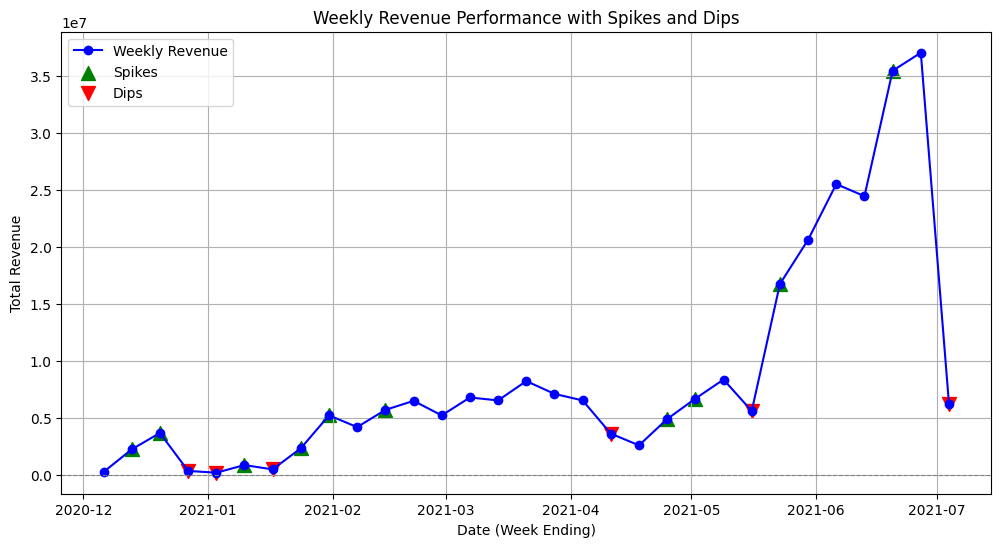

In [119]:
# Calculate WoW percentage change
weekly_data = test['Total'].resample('W-SUN').sum()
weekly_data_pct_change = weekly_data.pct_change() * 100

# Identify spikes and dips based on thresholds
spikes = weekly_data_pct_change[weekly_data_pct_change >= 30]
dips = weekly_data_pct_change[weekly_data_pct_change <= -30]

# Print the weeks with spikes and dips
print("Weeks with Revenue Spikes:")
print(spikes)

print("\nWeeks with Revenue Dips:")
print(dips)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o', color='blue', label='Weekly Revenue')

# Highlight spikes
plt.scatter(spikes.index, weekly_data[spikes.index], color='green', label='Spikes', marker='^', s=100)

# Highlight dips
plt.scatter(dips.index, weekly_data[dips.index], color='red', label='Dips', marker='v', s=100)

# Add labels and legend
plt.title('Weekly Revenue Performance with Spikes and Dips')
plt.xlabel('Date (Week Ending)')
plt.ylabel('Total Revenue')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()

plt.show()

In [120]:
# Filter data for spike and dip weeks
spike_weeks_data = test[test.index.isin(spikes.index)]
dip_weeks_data = test[test.index.isin(dips.index)]

# Analyze Product Contribution
spike_product_revenue = spike_weeks_data.groupby('Product')['Total'].sum().sort_values(ascending=False)
dip_product_revenue = dip_weeks_data.groupby('Product')['Total'].sum().sort_values(ascending=False)

# Analyze City Contribution
spike_city_revenue = spike_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)
dip_city_revenue = dip_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)

# Analyze Discounts
average_spike_discount = spike_weeks_data['Discount Amount'].mean()
average_dip_discount = dip_weeks_data['Discount Amount'].mean()

print("Top Products During Spikes:")
print(spike_product_revenue.head())

print("\nTop Products During Dips:")
print(dip_product_revenue.head())

print("\nTop Cities During Spikes:")
print(spike_city_revenue.head())

print("\nTop Cities During Dips:")
print(dip_city_revenue.head())

print("\nAverage Discount During Spikes: ", average_spike_discount)
print("Average Discount During Dips: ", average_dip_discount)




Top Products During Spikes:
Product
The Ultimate Leggings - L-una                                             2525136.0
The Ultimate Leggings - M-aia                                             1919040.0
The Ultimate Leggings - XL-una                                            1919040.0
The Ultimate Leggings - Black - L-una                                     1055472.0
The Ultimate Leggings - Navy - L-una [PRE-ORDER: DISPATCH ON 1ST JULY]     767616.0
Name: Total, dtype: float64

Top Products During Dips:
Product
The Ultimate Leggings - XL-una                                   447776.0
The Ultimate Leggings - XXL-una                                  383808.0
The Ultimate Leggings - M-aia                                    223888.0
The Ultimate Leggings - L-una                                    191904.0
The Ultimate Leggings - L-una [ PRE-ORDER APRIL 12TH RESTOCK]    191904.0
Name: Total, dtype: float64

Top Cities During Spikes:
Shipping City
mumbai       2942528.0
bengaluru    102348

In [60]:
# 1. Maximum Discount
max_discount = test['Discount Amount'].max()

print("Maximum Discount Applied: ", max_discount)

# 2. Identify Major Spike Week
major_spike_week = spikes.idxmax()  # Week with the highest WoW percentage increase
print("Major Spike Week: ", major_spike_week)

# Filter data for the major spike week
major_spike_data = test[test.index.to_period('W') == major_spike_week.to_period('W')]

# Calculate discount statistics for the major spike week
total_discount_spike = major_spike_data['Discount Amount'].sum()
average_discount_spike = major_spike_data['Discount Amount'].mean()
max_discount_spike = major_spike_data['Discount Amount'].max()

# Compare with overall average discount
overall_avg_discount = data['Discount Amount'].mean()

print("\nDiscount Statistics During Major Spike Week:")
print(f"  Total Discount: {total_discount_spike}")
print(f"  Average Discount: {average_discount_spike}")
print(f"  Maximum Discount: {max_discount_spike}")
print("\nOverall Average Discount: ", overall_avg_discount)

# Insights
if average_discount_spike > overall_avg_discount:
    print("\nObservation: Discounts were higher than usual during the major spike week, indicating their possible contribution to the revenue spike.")
else:
    print("\nObservation: Discounts were not significantly higher during the major spike week, suggesting other factors drove the spike.")

Maximum Discount Applied:  3998.0
Major Spike Week:  2020-12-13 00:00:00

Discount Statistics During Major Spike Week:
  Total Discount: 3200.0
  Average Discount: 2.857142857142857
  Maximum Discount: 100.0

Overall Average Discount:  51.37810578105781

Observation: Discounts were not significantly higher during the major spike week, suggesting other factors drove the spike.


In [121]:
# 1. Identify Major Dip Week
major_dip_week = dips.idxmin()  # Week with the highest WoW percentage decrease
print("Major Dip Week: ", major_dip_week)

# Filter data for the major dip week
major_dip_data = test[test.index.to_period('W') == major_dip_week.to_period('W')]

# Calculate discount statistics for the major dip week
total_discount_dip = major_dip_data['Discount Amount'].sum()
average_discount_dip = major_dip_data['Discount Amount'].mean()
max_discount_dip = major_dip_data['Discount Amount'].max()

# Compare with overall average discount
overall_avg_discount = test['Discount Amount'].mean()

print("\nDiscount Statistics During Major Dip Week:")
print(f"  Total Discount: {total_discount_dip}")
print(f"  Average Discount: {average_discount_dip}")
print(f"  Maximum Discount: {max_discount_dip}")
print("\nOverall Average Discount: ", overall_avg_discount)

# Insights
if average_discount_dip > overall_avg_discount:
    print("\nObservation: Discounts were higher than usual during the major dip week, which might have contributed to the revenue dip.")
else:
    print("\nObservation: Discounts were not significantly higher during the major dip week, suggesting other factors caused the dip.")

Major Dip Week:  2020-12-27 00:00:00

Discount Statistics During Major Dip Week:
  Total Discount: 1600.0
  Average Discount: 9.090909090909092
  Maximum Discount: 100.0

Overall Average Discount:  50.70907747259515

Observation: Discounts were not significantly higher during the major dip week, suggesting other factors caused the dip.


Top Cities During Spikes (Revenue):
Shipping City
mumbai        2942528.0
bengaluru     1023488.0
bangalore      831584.0
pune           767616.0
new delhi      639680.0
hyderabad      447776.0
gurgaon        447776.0
bangalore      447776.0
chennai        383808.0
delhi          383808.0
Name: Total, dtype: float64

Top Cities During Dips (Revenue):
Shipping City
mumbai             351824.0
bangalore          127936.0
new delhi          127936.0
noida               95952.0
gurugram            95952.0
pune                95952.0
bengaluru           95952.0
chikkamagaluru      63968.0
ernakulam           63968.0
gurgaon             63968.0
Name: Total, dtype: float64


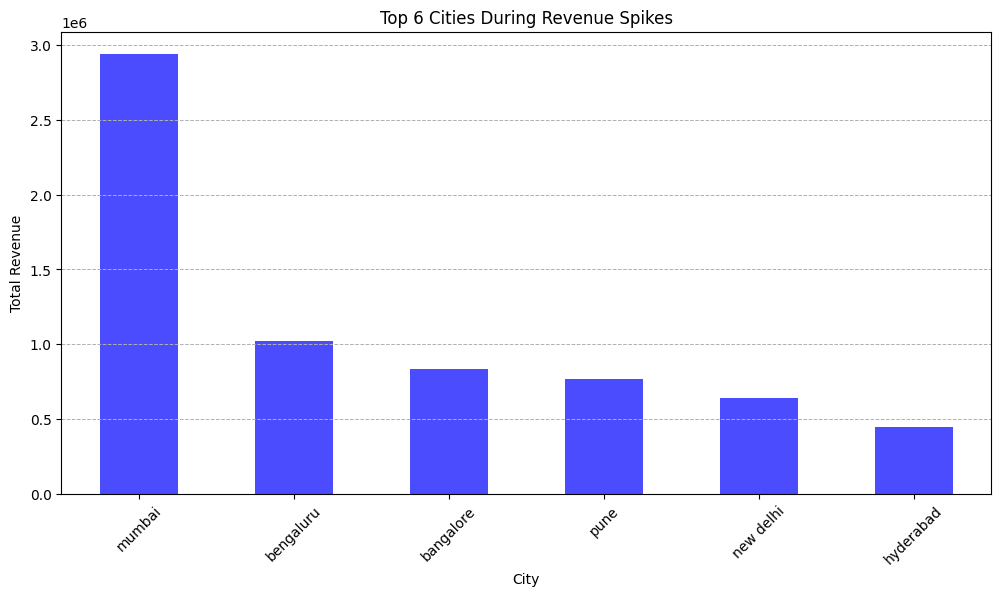

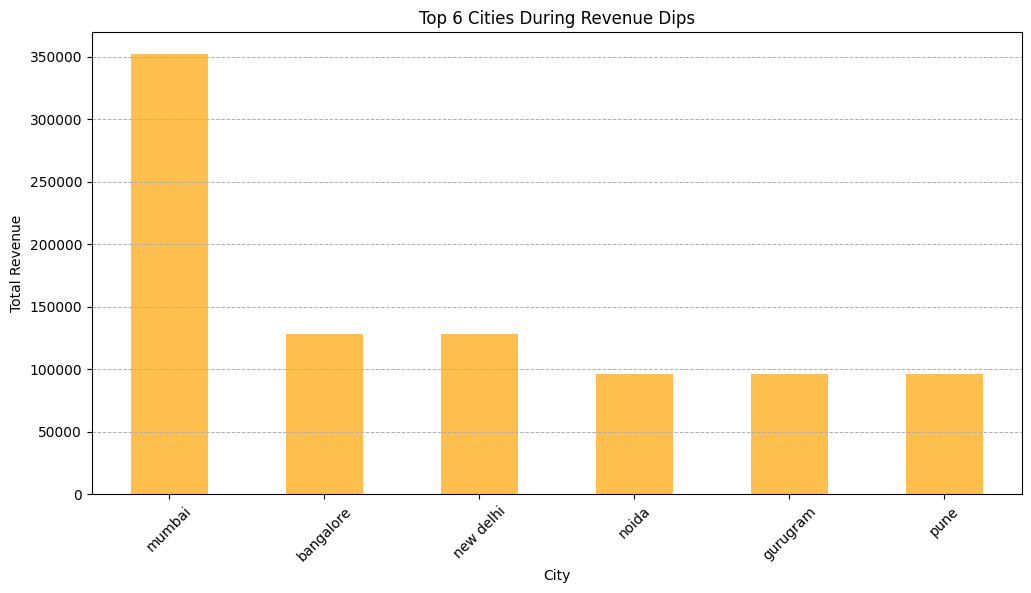

In [65]:
# Filter data for spike and dip weeks
spike_weeks_data = test[test.index.isin(spikes.index)]
dip_weeks_data = test[test.index.isin(dips.index)]

# Aggregate revenue by Shipping City
spike_city_revenue = spike_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)
dip_city_revenue = dip_weeks_data.groupby('Shipping City')['Total'].sum().sort_values(ascending=False)

# Print Top Cities During Spikes
print("Top Cities During Spikes (Revenue):")
print(spike_city_revenue.head(10))

# Print Top Cities During Dips
print("\nTop Cities During Dips (Revenue):")
print(dip_city_revenue.head(10))

# Visualize Top Cities During Spikes
import matplotlib.pyplot as plt

# Visualize Top 6 Cities During Spikes
plt.figure(figsize=(12, 6))
spike_city_revenue.head(6).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 6 Cities During Revenue Spikes')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Visualize Top 6 Cities During Dips
plt.figure(figsize=(12, 6))
dip_city_revenue.head(6).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 6 Cities During Revenue Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()



Bottom 10 Cities During Spikes (Revenue):
Shipping City
bagalore       30384.0
new panvel     31984.0
mysuru         31984.0
narsipatnam    31984.0
chandragiri    31984.0
chandhigaru    31984.0
chanchal       31984.0
howrah         31984.0
phaltan        31984.0
lonavala       31984.0
Name: Total, dtype: float64

Bottom 10 Cities During Dips (Revenue):
Shipping City
satara         31984.0
panaji         31984.0
chandigarh     31984.0
chennai        31984.0
coimbatore     31984.0
mumbai         31984.0
mandla         31984.0
nagpur         63968.0
nagaon         63968.0
mumbai         63968.0
Name: Total, dtype: float64


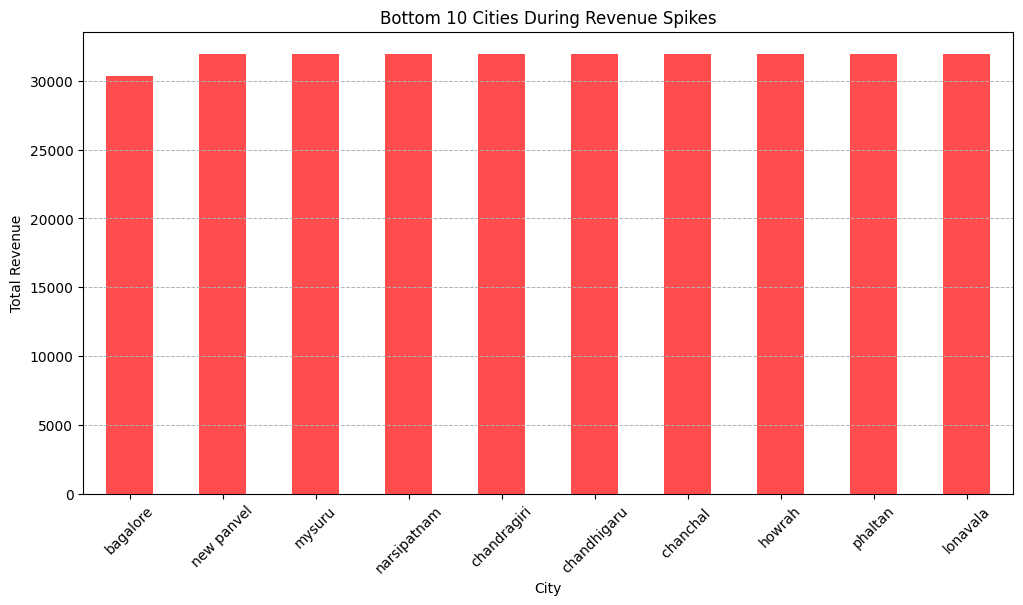

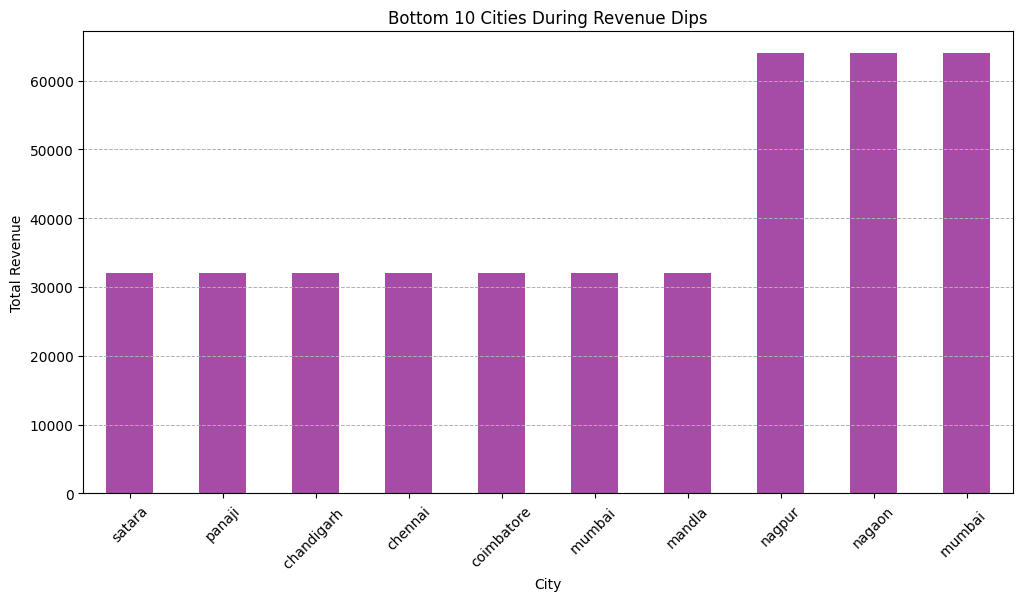

In [122]:
# Bottom 10 Cities During Spikes
bottom_spike_city_revenue = spike_weeks_data.groupby('Shipping City')['Total'].sum().sort_values().head(10)
print("Bottom 10 Cities During Spikes (Revenue):")
print(bottom_spike_city_revenue)

# Bottom 10 Cities During Dips
bottom_dip_city_revenue = dip_weeks_data.groupby('Shipping City')['Total'].sum().sort_values().head(10)
print("\nBottom 10 Cities During Dips (Revenue):")
print(bottom_dip_city_revenue)

# Visualize Bottom 10 Cities During Spikes
plt.figure(figsize=(12, 6))
bottom_spike_city_revenue.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bottom 10 Cities During Revenue Spikes')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Visualize Bottom 10 Cities During Dips
plt.figure(figsize=(12, 6))
bottom_dip_city_revenue.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Bottom 10 Cities During Revenue Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


Top 6 Cities: Revenue During Spikes, Dips, and Max Dip Date
------------------------------------------------------------
City           Spike Revenue  Dip Revenue    Max Dip Date   
------------------------------------------------------------
mumbai         2,942,528.00   351,824.00     <15
bengaluru      1,023,488.00   95,952.00      <15
bangalore      831,584.00     127,936.00     <15
pune           767,616.00     95,952.00      <15
new delhi      639,680.00     127,936.00     <15
hyderabad      447,776.00     0.00           No data        
------------------------------------------------------------


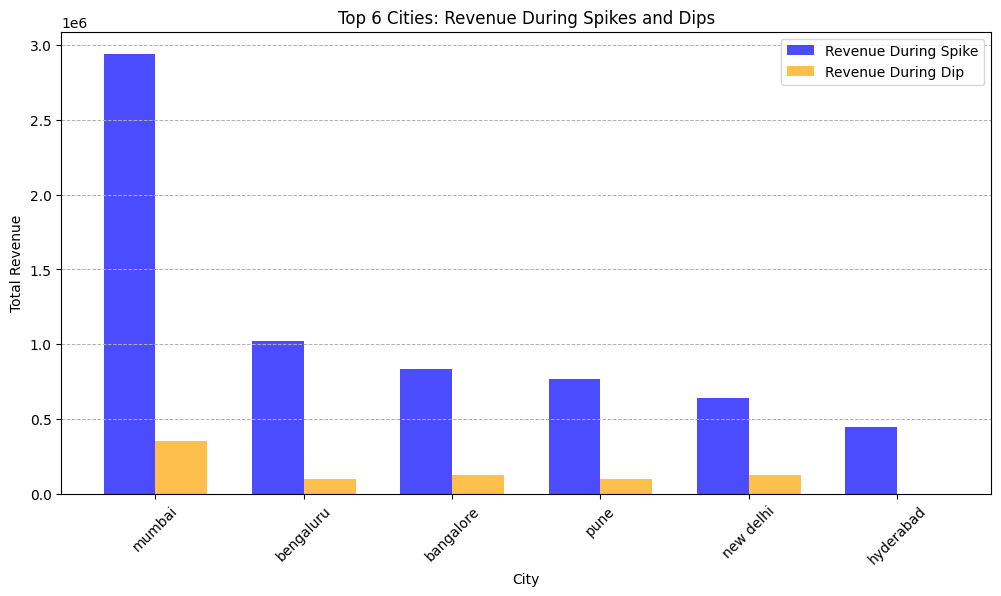

In [123]:
import numpy as np

# Get the top 6 cities during spike weeks
top_6_cities = spike_city_revenue.head(6).index

# Extract revenue for the top 6 cities during spike and dip weeks
spike_revenues = spike_weeks_data[spike_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()
dip_revenues = dip_weeks_data[dip_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()

# Ensure all cities are included even if revenue is 0 during dips
spike_revenues = spike_revenues.reindex(top_6_cities, fill_value=0)
dip_revenues = dip_revenues.reindex(top_6_cities, fill_value=0)

# Identify the exact date of the maximum dip for each city
max_dip_dates = {}
for city in top_6_cities:
    city_dip_data = dip_weeks_data[dip_weeks_data['Shipping City'] == city]
    if not city_dip_data.empty:
        # Find the date with the minimum revenue
        min_date = city_dip_data.groupby(city_dip_data.index)['Total'].sum().idxmin()
        max_dip_dates[city] = min_date.date()  # Extract just the date
    else:
        max_dip_dates[city] = "No data"

# Print the values in a table format
print("Top 6 Cities: Revenue During Spikes, Dips, and Max Dip Date")
print("-" * 60)
print(f"{'City':<15}{'Spike Revenue':<15}{'Dip Revenue':<15}{'Max Dip Date':<15}")
print("-" * 60)
for city in top_6_cities:
    print(f"{city:<15}{spike_revenues[city]:<15,.2f}{dip_revenues[city]:<15,.2f}{max_dip_dates[city]:<15}")
print("-" * 60)

# Create a grouped bar chart for comparison
x = np.arange(len(top_6_cities))  # X positions for the cities
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, spike_revenues, width, label='Revenue During Spike', color='blue', alpha=0.7)
plt.bar(x + width/2, dip_revenues, width, label='Revenue During Dip', color='orange', alpha=0.7)

# Add labels and title
plt.title('Top 6 Cities: Revenue During Spikes and Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(x, top_6_cities, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


Top 6 Cities: Revenue During Spikes and Dips
----------------------------------------
City           Spike Revenue  Dip Revenue    
----------------------------------------
mumbai         2,942,528.00   351,824.00     
bengaluru      1,023,488.00   95,952.00      
bangalore      831,584.00     127,936.00     
pune           767,616.00     95,952.00      
new delhi      639,680.00     127,936.00     
hyderabad      447,776.00     0.00           
----------------------------------------


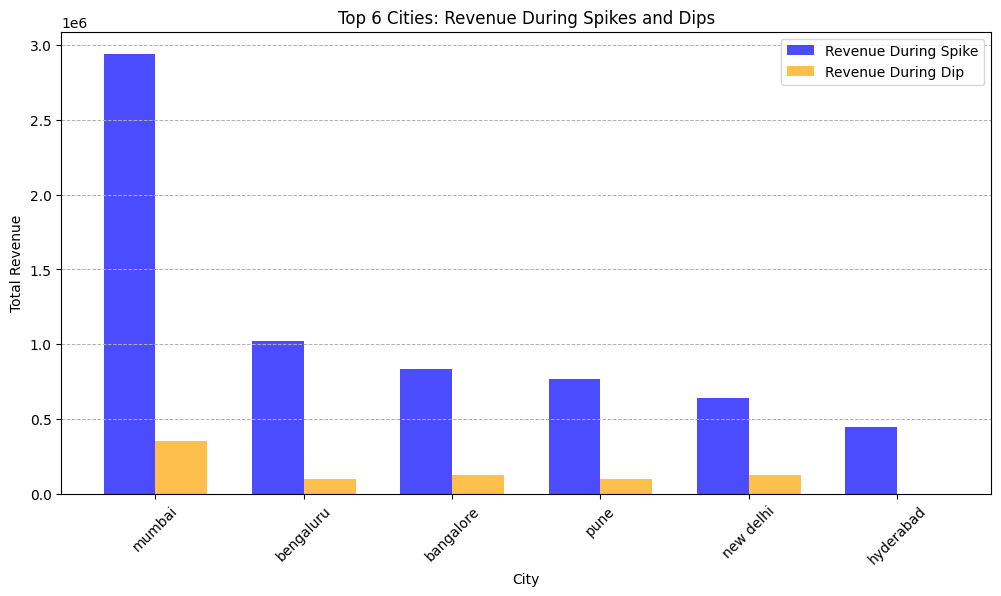

In [68]:
import numpy as np

# Get the top 6 cities during spike weeks
top_6_cities = spike_city_revenue.head(6).index

# Extract revenue for the top 6 cities during spike and dip weeks
spike_revenues = spike_weeks_data[spike_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()
dip_revenues = dip_weeks_data[dip_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()

# Ensure all cities are included even if revenue is 0 during dips
spike_revenues = spike_revenues.reindex(top_6_cities, fill_value=0)
dip_revenues = dip_revenues.reindex(top_6_cities, fill_value=0)

# Print the values in a table format
print("Top 6 Cities: Revenue During Spikes and Dips")
print("-" * 40)
print(f"{'City':<15}{'Spike Revenue':<15}{'Dip Revenue':<15}")
print("-" * 40)
for city in top_6_cities:
    print(f"{city:<15}{spike_revenues[city]:<15,.2f}{dip_revenues[city]:<15,.2f}")
print("-" * 40)

# Create a grouped bar chart for comparison
x = np.arange(len(top_6_cities))  # X positions for the cities
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, spike_revenues, width, label='Revenue During Spike', color='blue', alpha=0.7)
plt.bar(x + width/2, dip_revenues, width, label='Revenue During Dip', color='orange', alpha=0.7)

# Add labels and title
plt.title('Top 6 Cities: Revenue During Spikes and Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(x, top_6_cities, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


Top 6 Cities: Revenue During Spikes, Dips, and Max Dip Date
------------------------------------------------------------
City           Spike Revenue  Dip Revenue    Max Dip Date   
------------------------------------------------------------
mumbai         2,942,528.00   351,824.00     <15
bengaluru      1,023,488.00   95,952.00      <15
bangalore      831,584.00     127,936.00     <15
pune           767,616.00     95,952.00      <15
new delhi      639,680.00     127,936.00     <15
hyderabad      447,776.00     0.00           No data        
------------------------------------------------------------


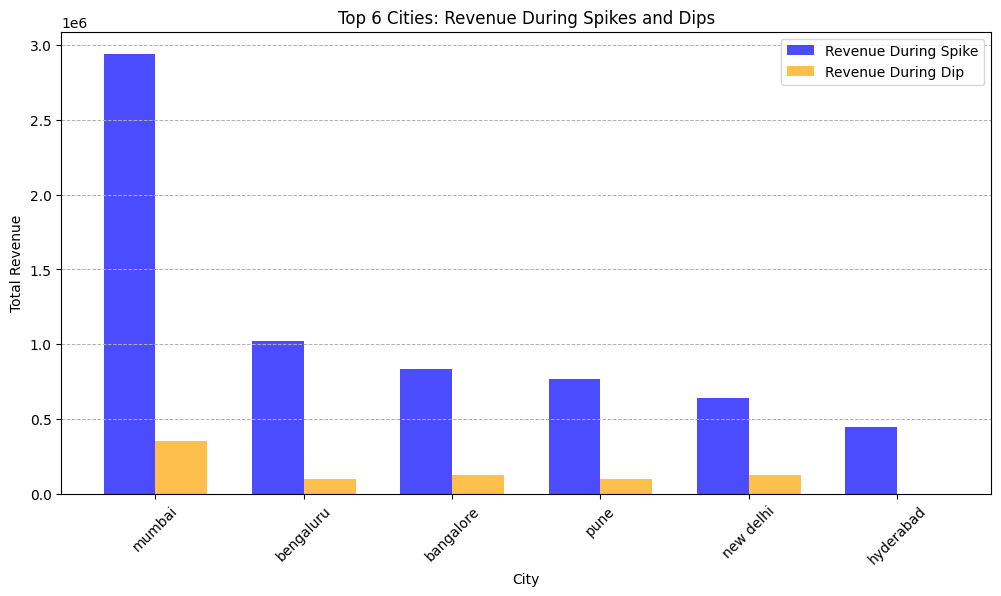

In [69]:
import numpy as np

# Get the top 6 cities during spike weeks
top_6_cities = spike_city_revenue.head(6).index

# Extract revenue for the top 6 cities during spike and dip weeks
spike_revenues = spike_weeks_data[spike_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()
dip_revenues = dip_weeks_data[dip_weeks_data['Shipping City'].isin(top_6_cities)].groupby('Shipping City')['Total'].sum()

# Ensure all cities are included even if revenue is 0 during dips
spike_revenues = spike_revenues.reindex(top_6_cities, fill_value=0)
dip_revenues = dip_revenues.reindex(top_6_cities, fill_value=0)

# Identify the exact date of the maximum dip for each city
max_dip_dates = {}
for city in top_6_cities:
    city_dip_data = dip_weeks_data[dip_weeks_data['Shipping City'] == city]
    if not city_dip_data.empty:
        # Find the date with the minimum revenue
        min_date = city_dip_data.groupby(city_dip_data.index)['Total'].sum().idxmin()
        max_dip_dates[city] = min_date.date()  # Extract just the date
    else:
        max_dip_dates[city] = "No data"

# Print the values in a table format
print("Top 6 Cities: Revenue During Spikes, Dips, and Max Dip Date")
print("-" * 60)
print(f"{'City':<15}{'Spike Revenue':<15}{'Dip Revenue':<15}{'Max Dip Date':<15}")
print("-" * 60)
for city in top_6_cities:
    print(f"{city:<15}{spike_revenues[city]:<15,.2f}{dip_revenues[city]:<15,.2f}{max_dip_dates[city]:<15}")
print("-" * 60)

# Create a grouped bar chart for comparison
x = np.arange(len(top_6_cities))  # X positions for the cities
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, spike_revenues, width, label='Revenue During Spike', color='blue', alpha=0.7)
plt.bar(x + width/2, dip_revenues, width, label='Revenue During Dip', color='orange', alpha=0.7)

# Add labels and title
plt.title('Top 6 Cities: Revenue During Spikes and Dips')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.xticks(x, top_6_cities, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


# Part 2

In [73]:
# Extract Size (captures XS, S, M, L, XL, XXL)
test['Size'] = test['Product'].str.extract(r'-\s*([XSML]{1,2}X?L?)')

color_1 = test['Product'].str.extract(r'-\s*([A-Za-z]+(?:-[a-z]+)?)\s*-\s*[XSML]{1,2}X?L?')
color_2 = test['Product'].str.extract(r'-\s*[A-Za-z]+\s*-\s*([a-z]+)')
test['Color'] = color_1[0].combine_first(color_2[0])


test['Pre_Order'] = test['Product'].str.contains(r'\[.*PRE-ORDER.*\]', case=False)

# Display the cleaned data
test.head()

ID   Total  Discount Amount  Lineitem quantity  \
Created Date                                                   
2020-12-05     1  1999.0              0.0                  1   
2020-12-05     2  1999.0              0.0                  1   
2020-12-05     3  1999.0              0.0                  1   
2020-12-05     4  1999.0              0.0                  1   
2020-12-05     5  1999.0              0.0                  1   

                                      Product Shipping City Shipping Zip  \
Created Date                                                               
2020-12-05      The Ultimate Leggings - L-una     bengaluru      '560064   
2020-12-05    The Ultimate Leggings - S-elene       gurgaon      '122001   
2020-12-05      The Ultimate Leggings - L-una     bangalore      '560072   
2020-12-05      The Ultimate Leggings - M-aia    bengaluru       '560102   
2020-12-05    The Ultimate Leggings - S-elene     bengaluru      '560102   

             Shipping Province Shipping Province Name Region Code  Main City  \
Created Date                                                                   
2020-12-05                  KA              Karnataka        '560  bangalore   
2020-12-05                  HR                Haryana        '122    gurgaon   
2020-12-05                  KA              Karnataka        '560  bangalore   
2020-12-05                  KA              Karnataka        '560  bangalore   
2020-12-05                  KA              Karnataka        '560  bangalore   

             Size  Color  Pre_Order  
Created Date                         
2020-12-05      L    una      False  
2020-12-05      S  elene      False  
2020-12-05      L    una      False  
2020-12-05      M    aia      False  
2020-12-05      S  elene      False

In [79]:
print(test.columns)

Index(['ID', 'Total', 'Discount Amount', 'Lineitem quantity', 'Product',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Province Name', 'Region Code', 'Main City', 'Size', 'Color',
       'Pre_Order'],
      dtype='object')


<Figure size 1400x800 with 0 Axes>

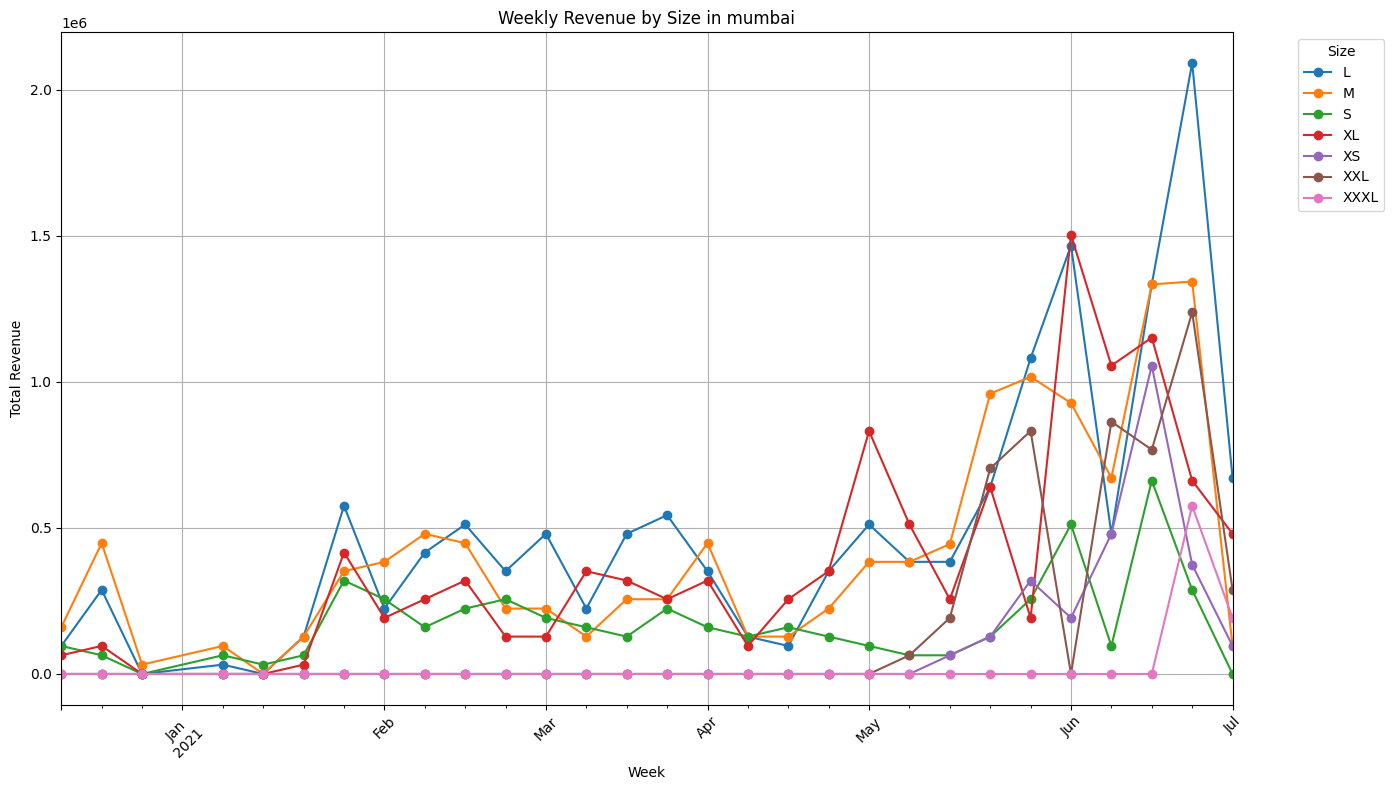

<Figure size 1400x800 with 0 Axes>

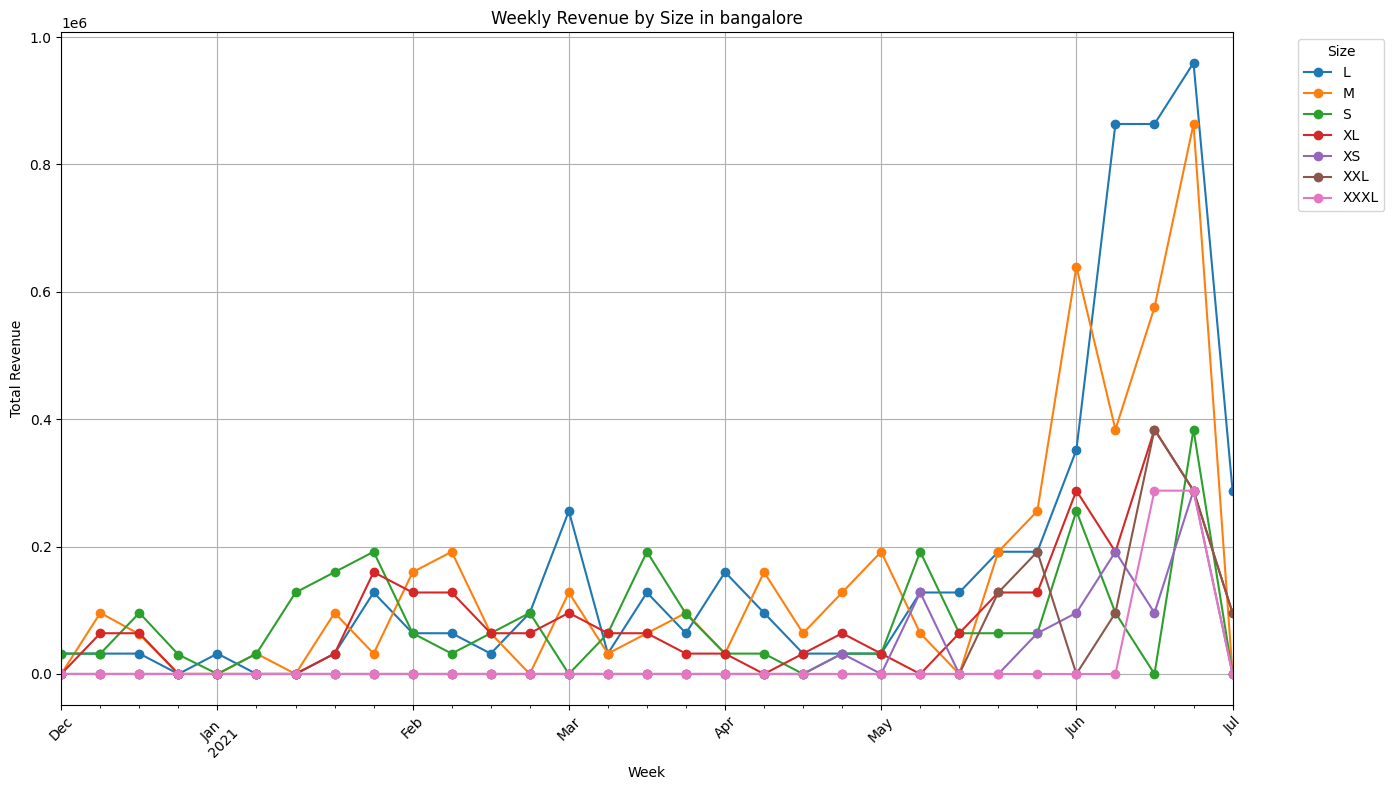

<Figure size 1400x800 with 0 Axes>

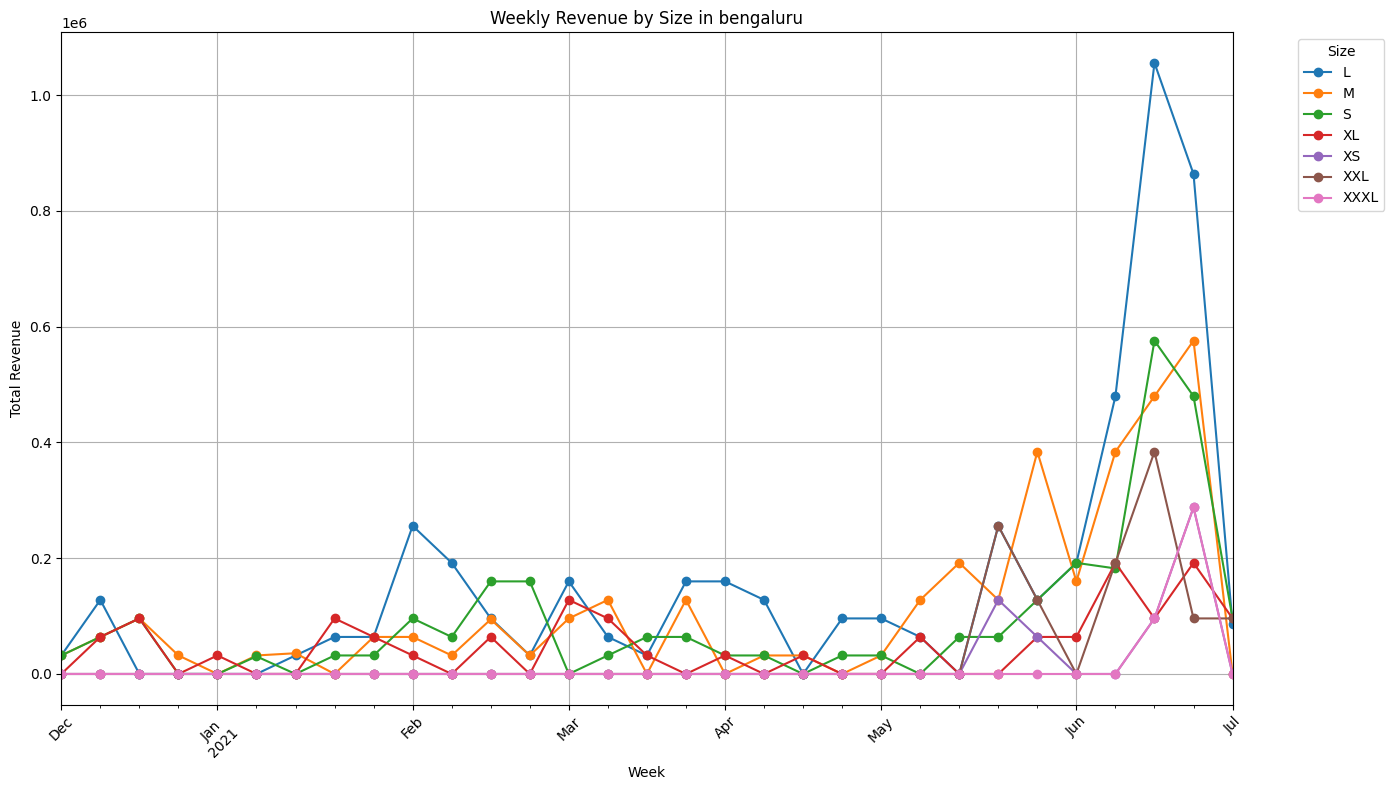

<Figure size 1400x800 with 0 Axes>

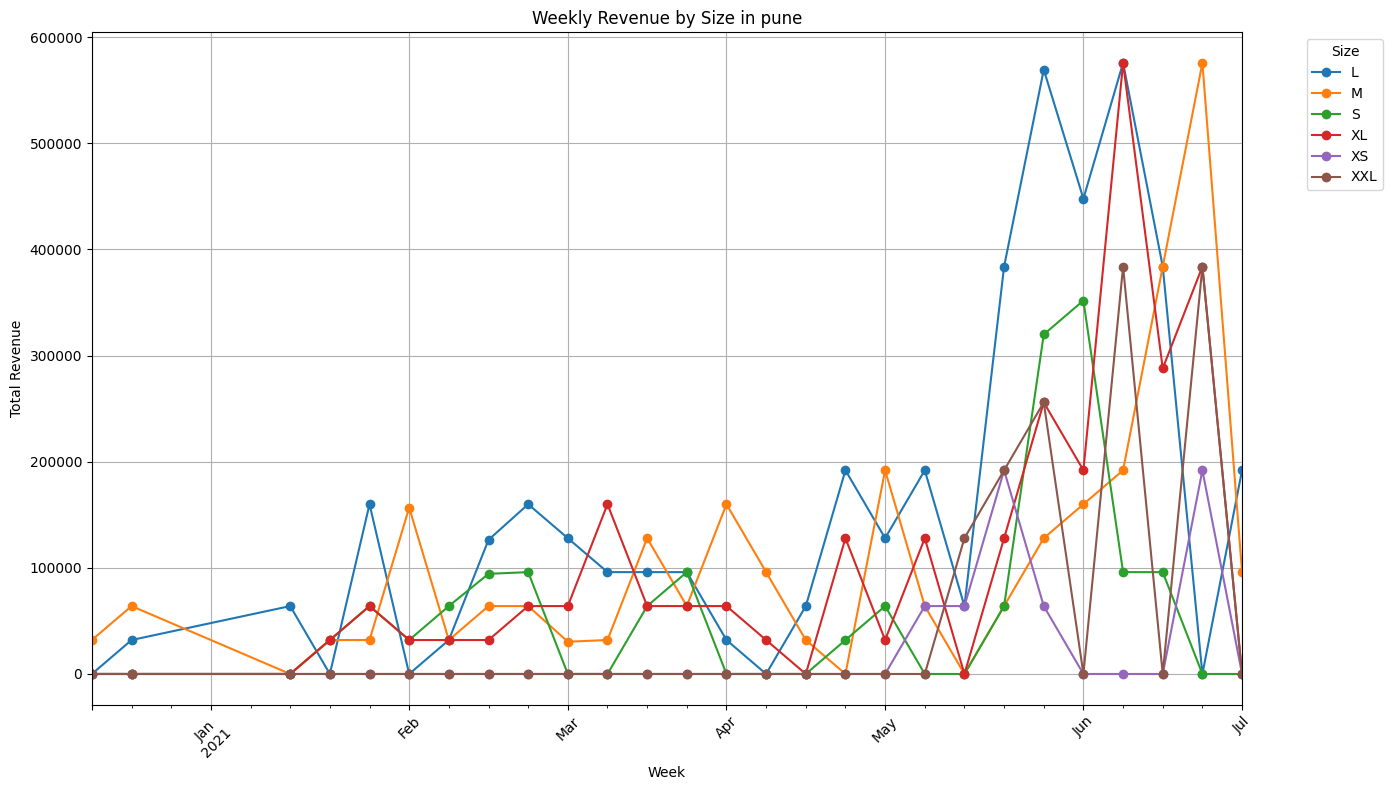

<Figure size 1400x800 with 0 Axes>

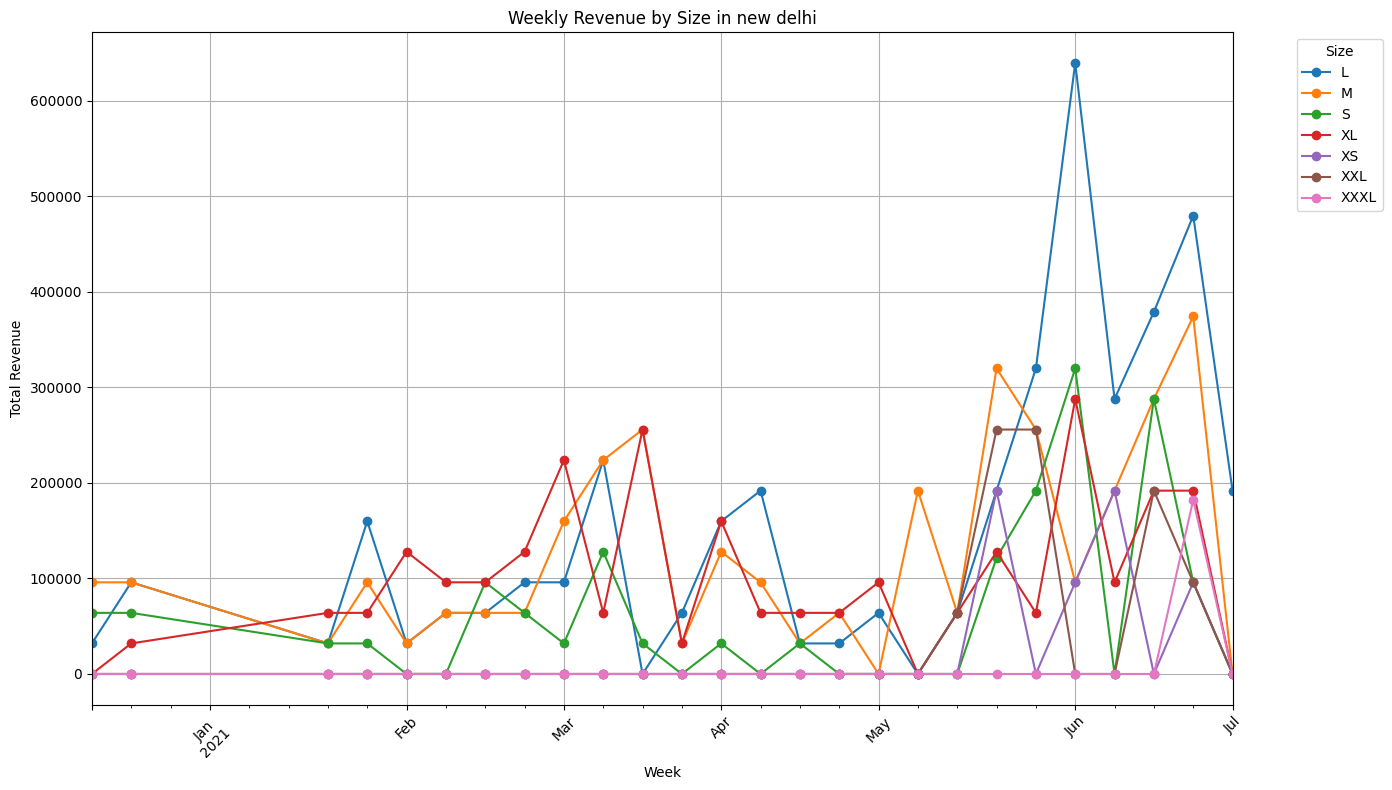

<Figure size 1400x800 with 0 Axes>

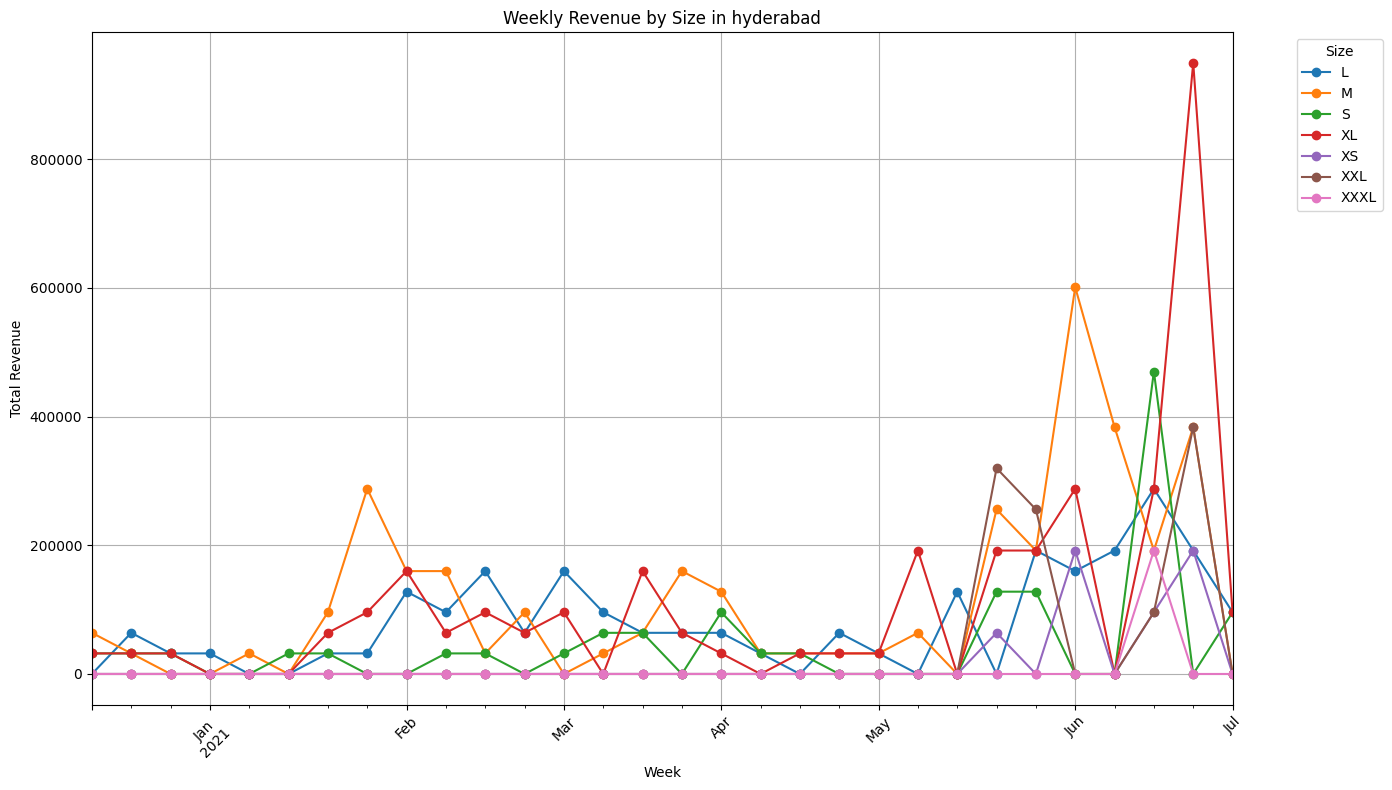

<Figure size 1400x800 with 0 Axes>

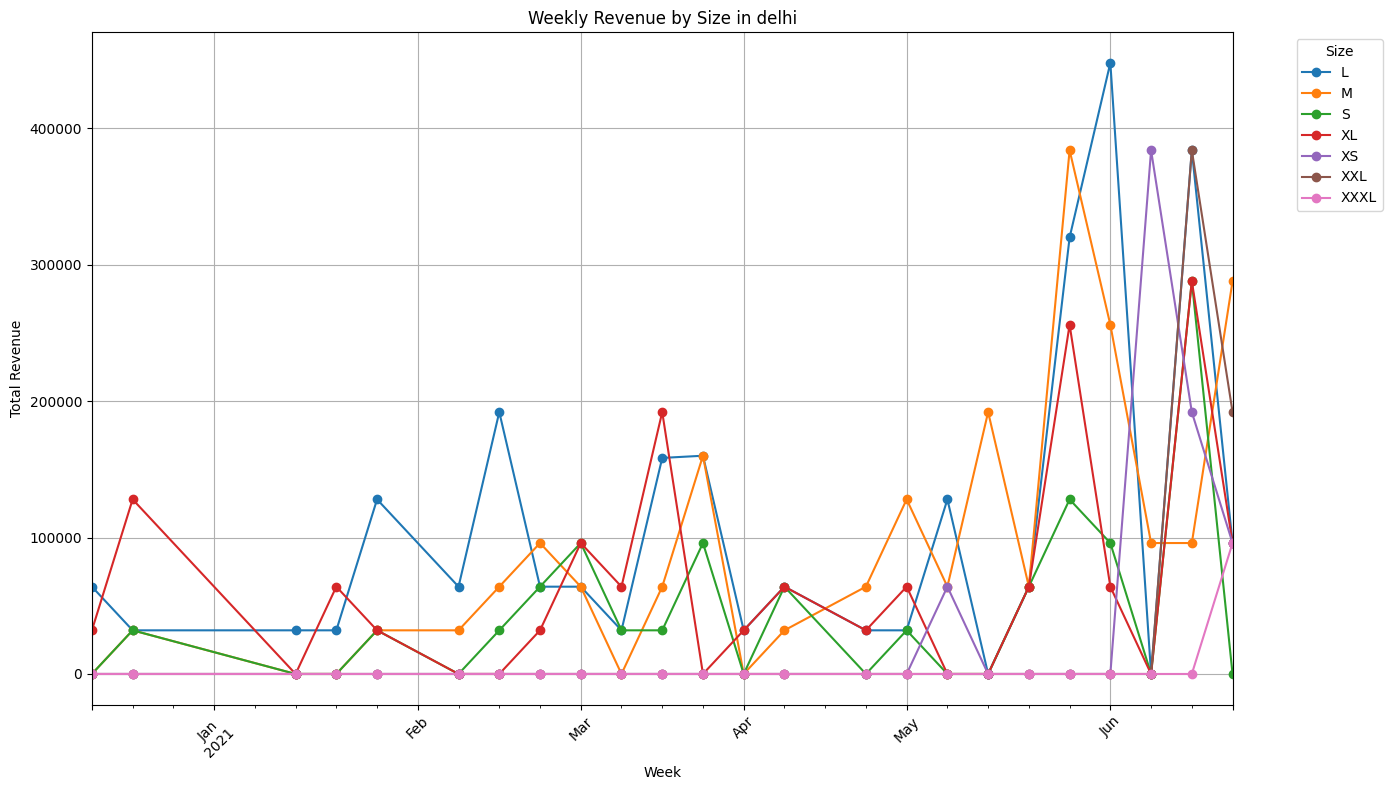

<Figure size 1400x800 with 0 Axes>

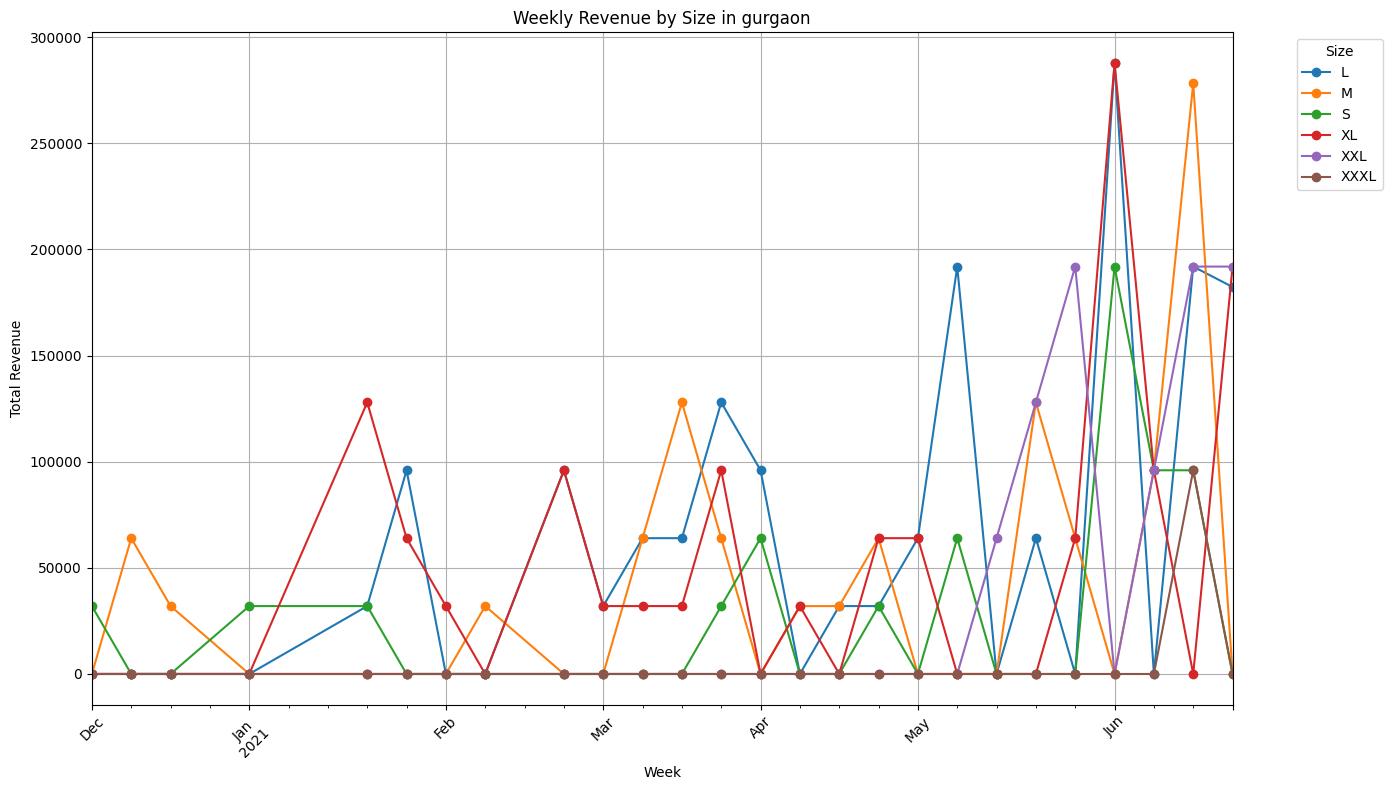

<Figure size 1400x800 with 0 Axes>

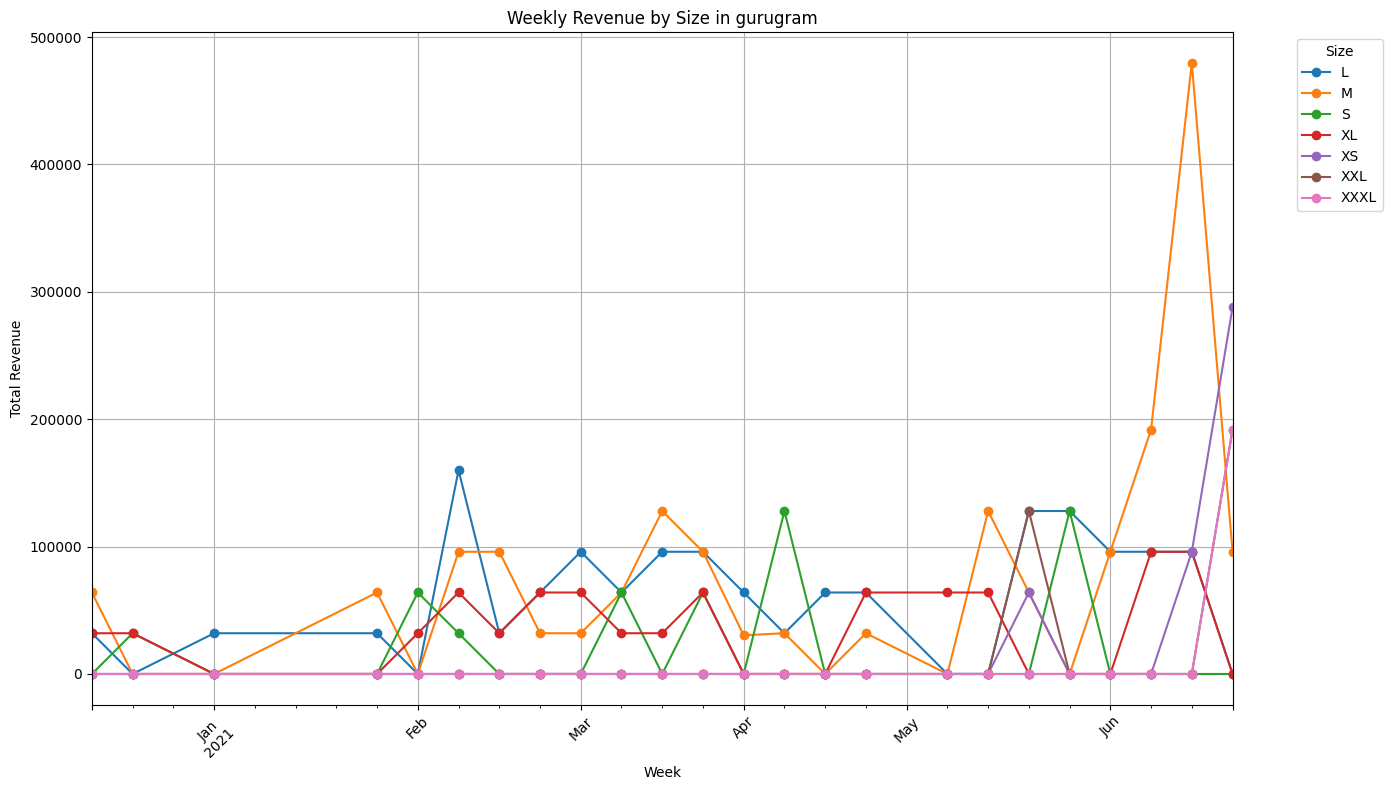

<Figure size 1400x800 with 0 Axes>

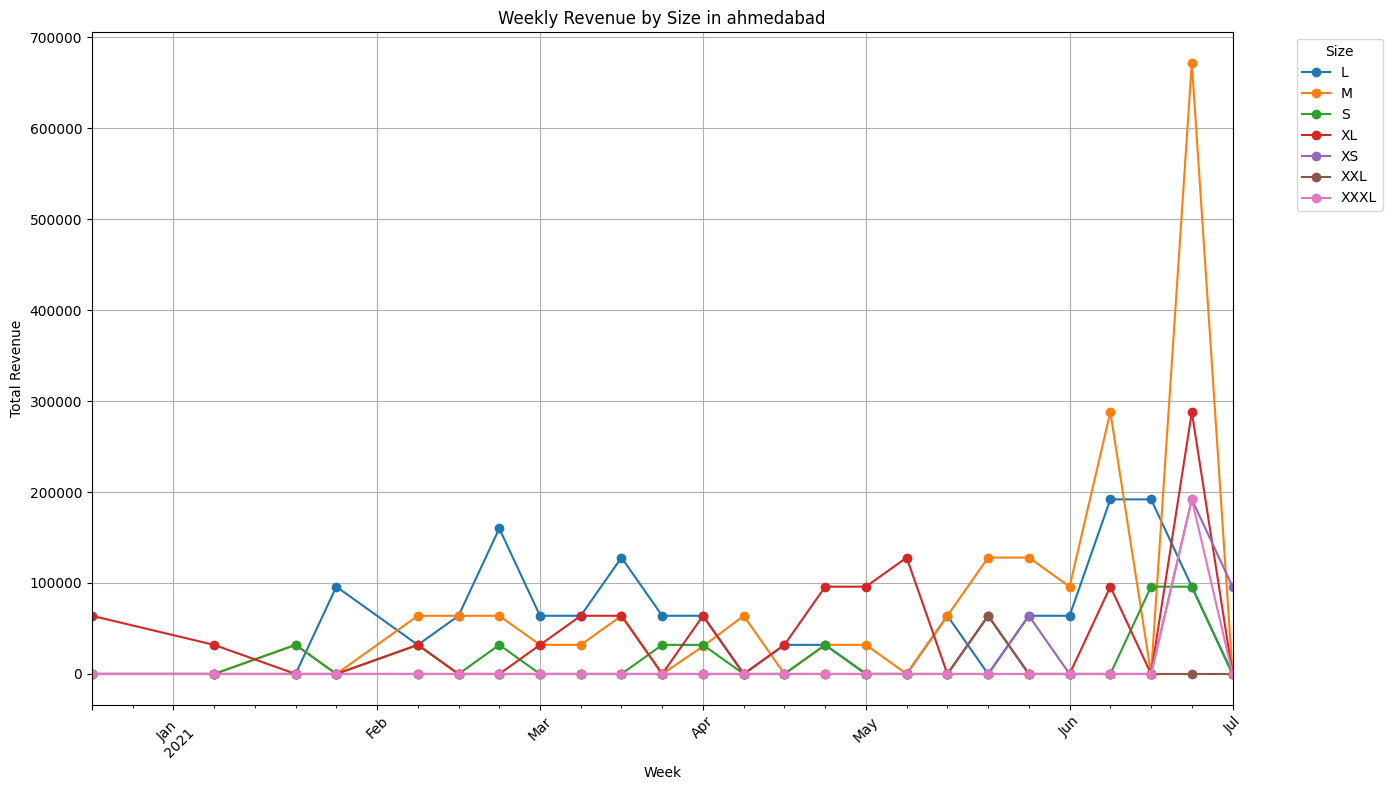

<Figure size 1400x800 with 0 Axes>

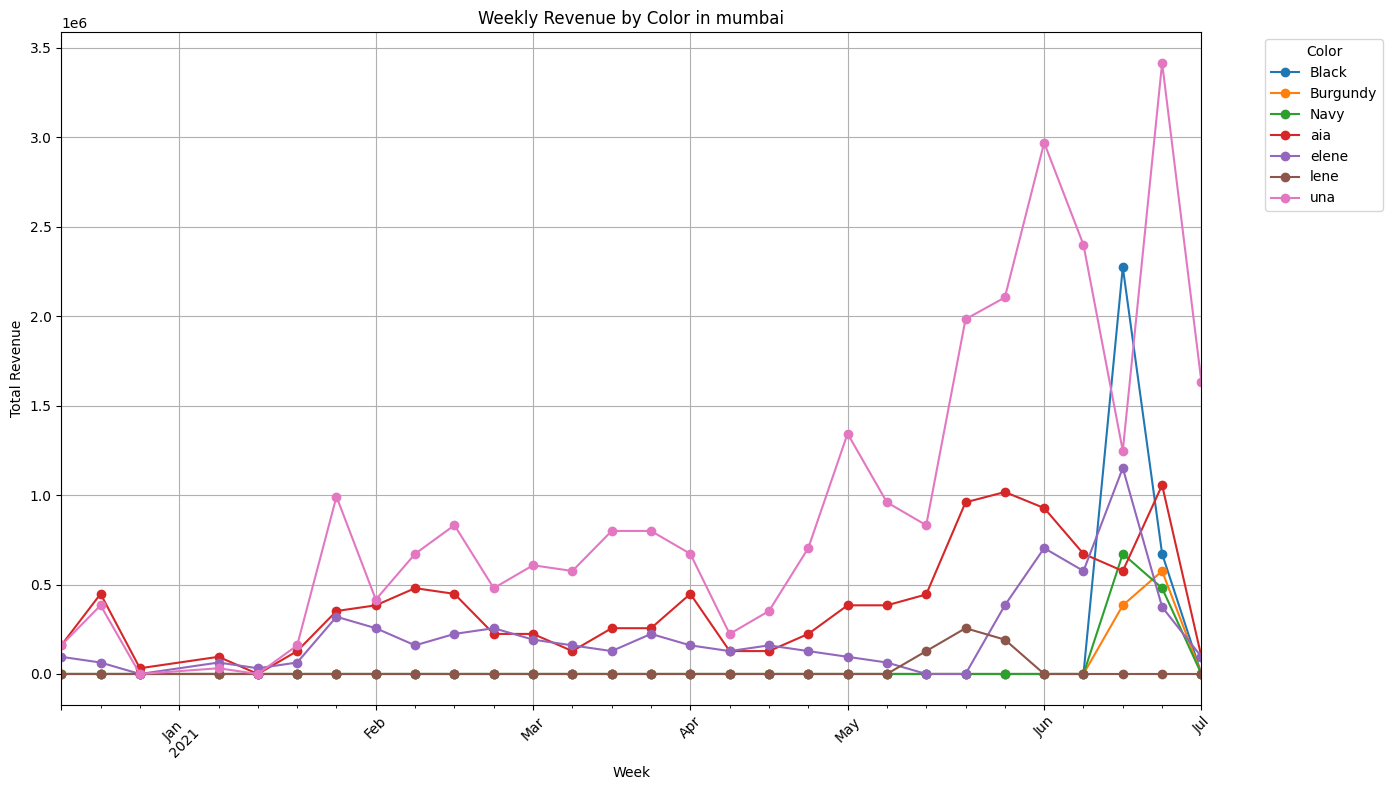

<Figure size 1400x800 with 0 Axes>

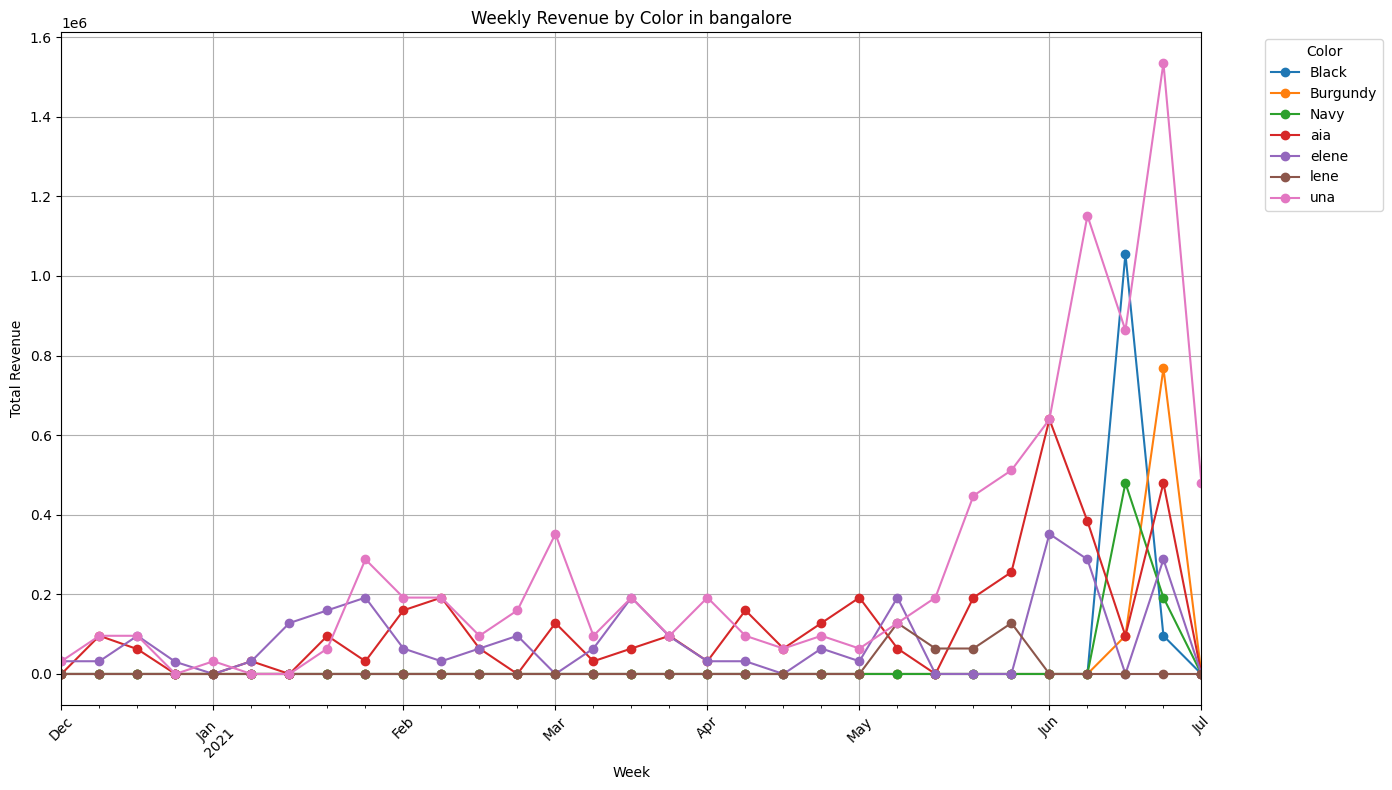

<Figure size 1400x800 with 0 Axes>

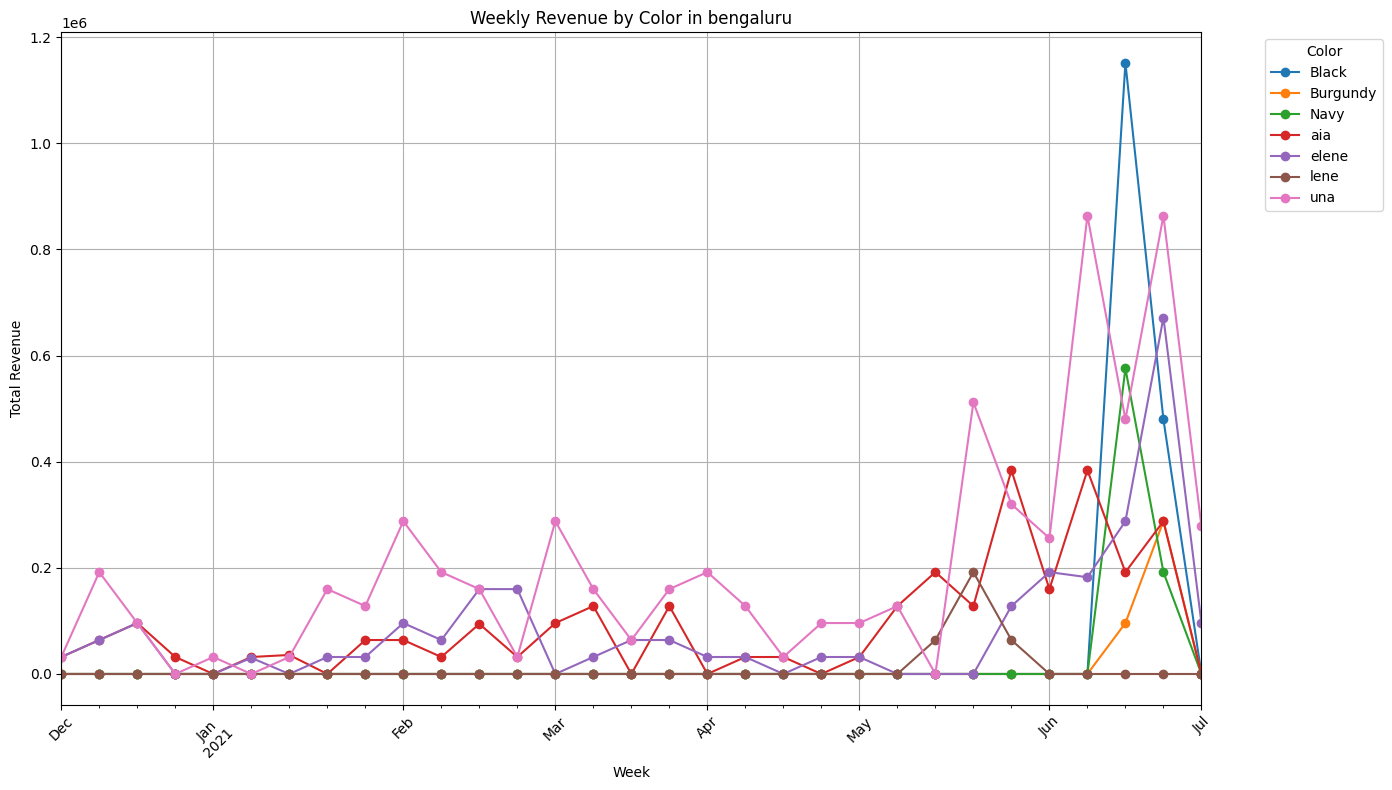

<Figure size 1400x800 with 0 Axes>

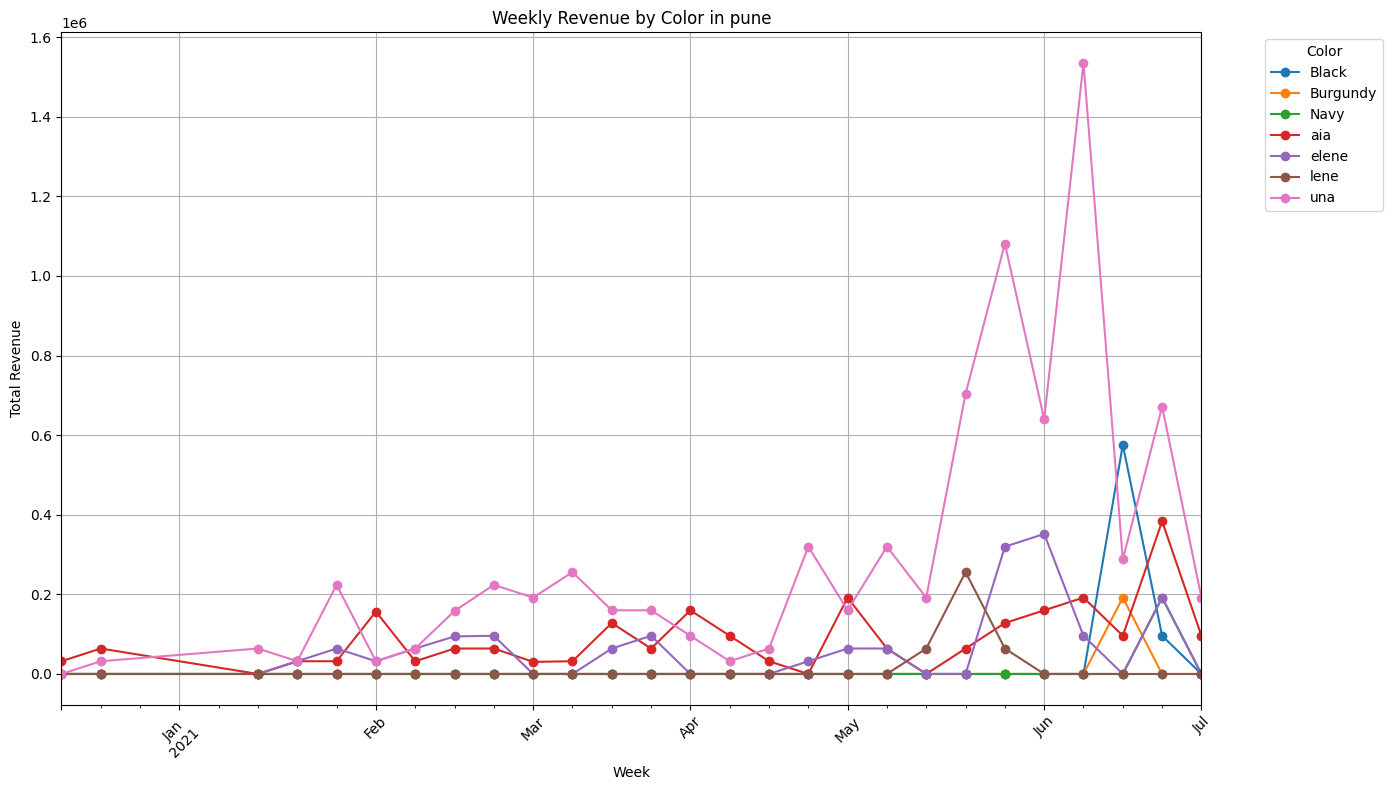

<Figure size 1400x800 with 0 Axes>

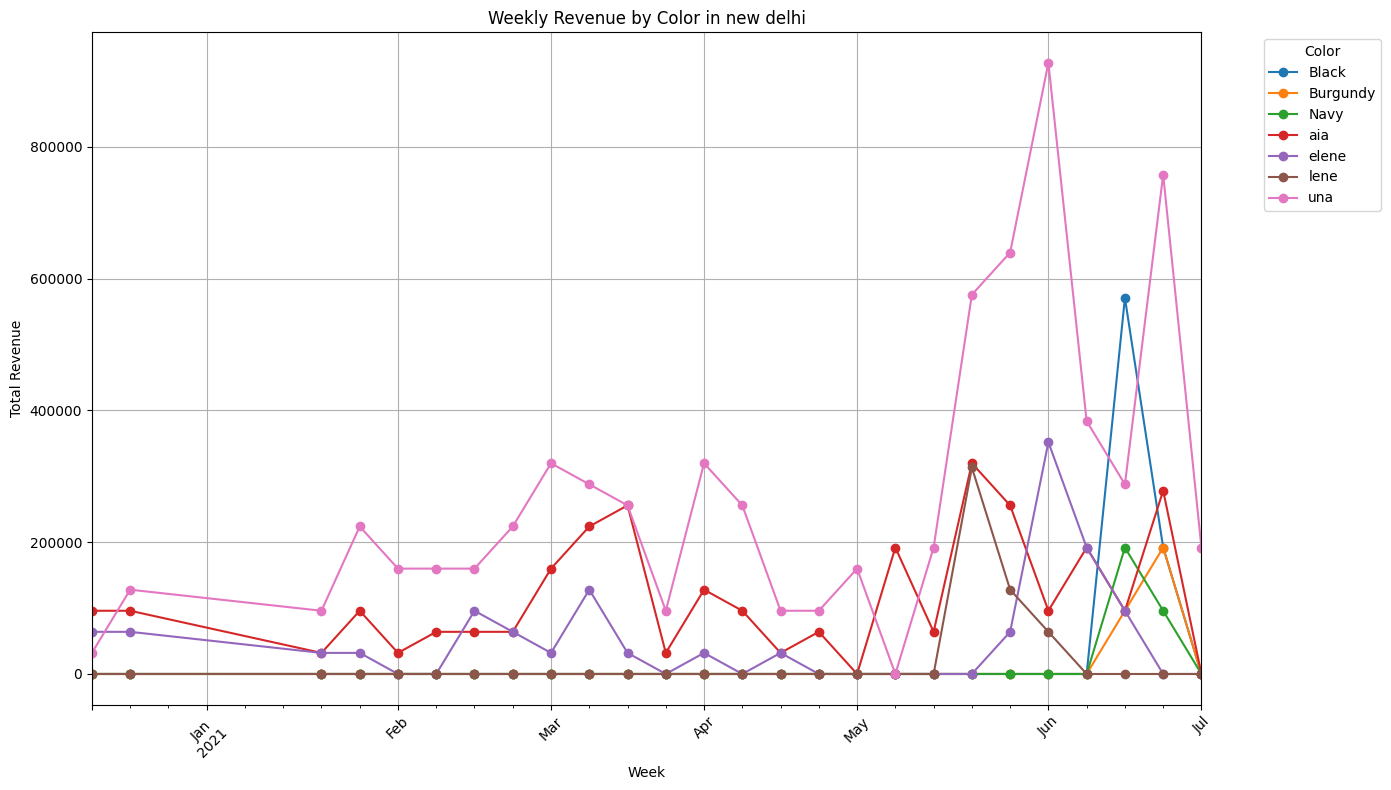

<Figure size 1400x800 with 0 Axes>

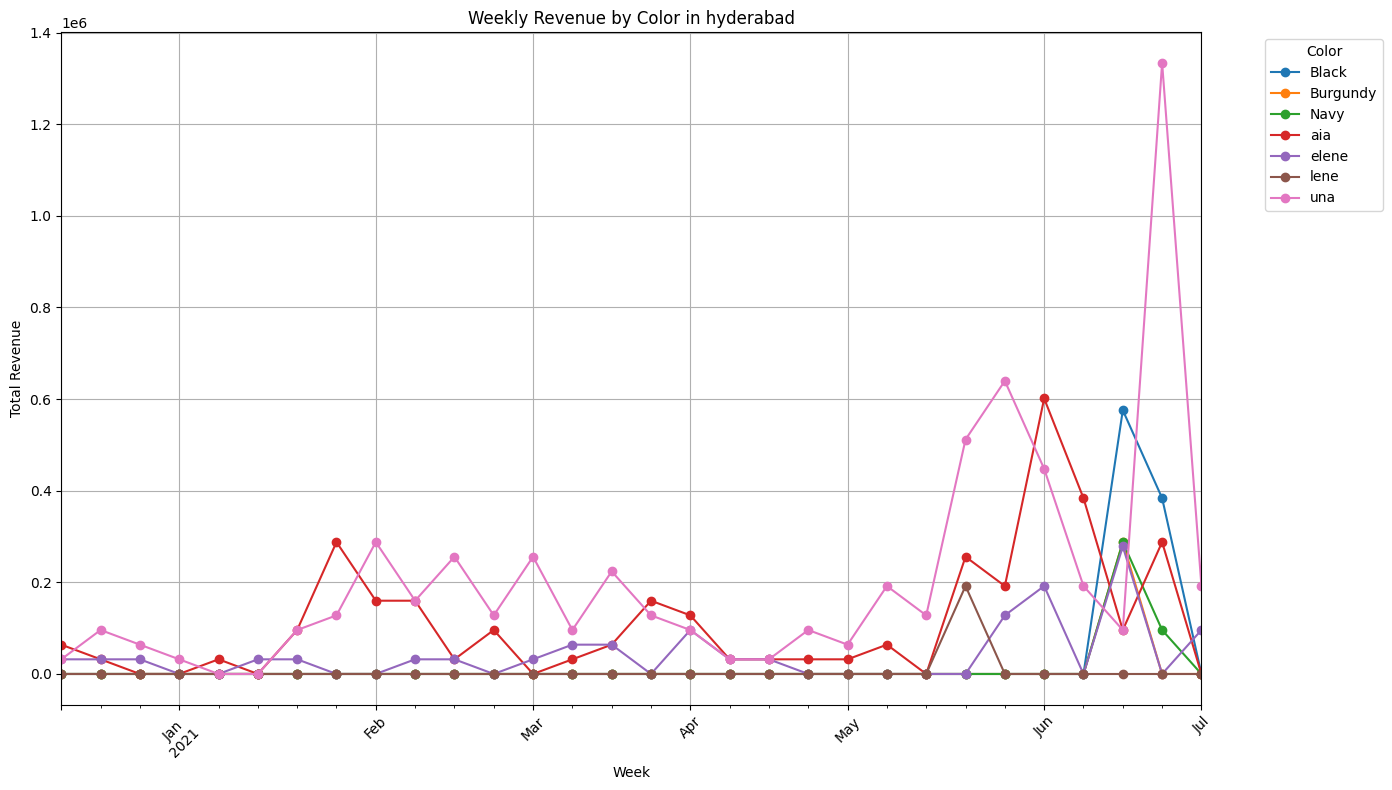

<Figure size 1400x800 with 0 Axes>

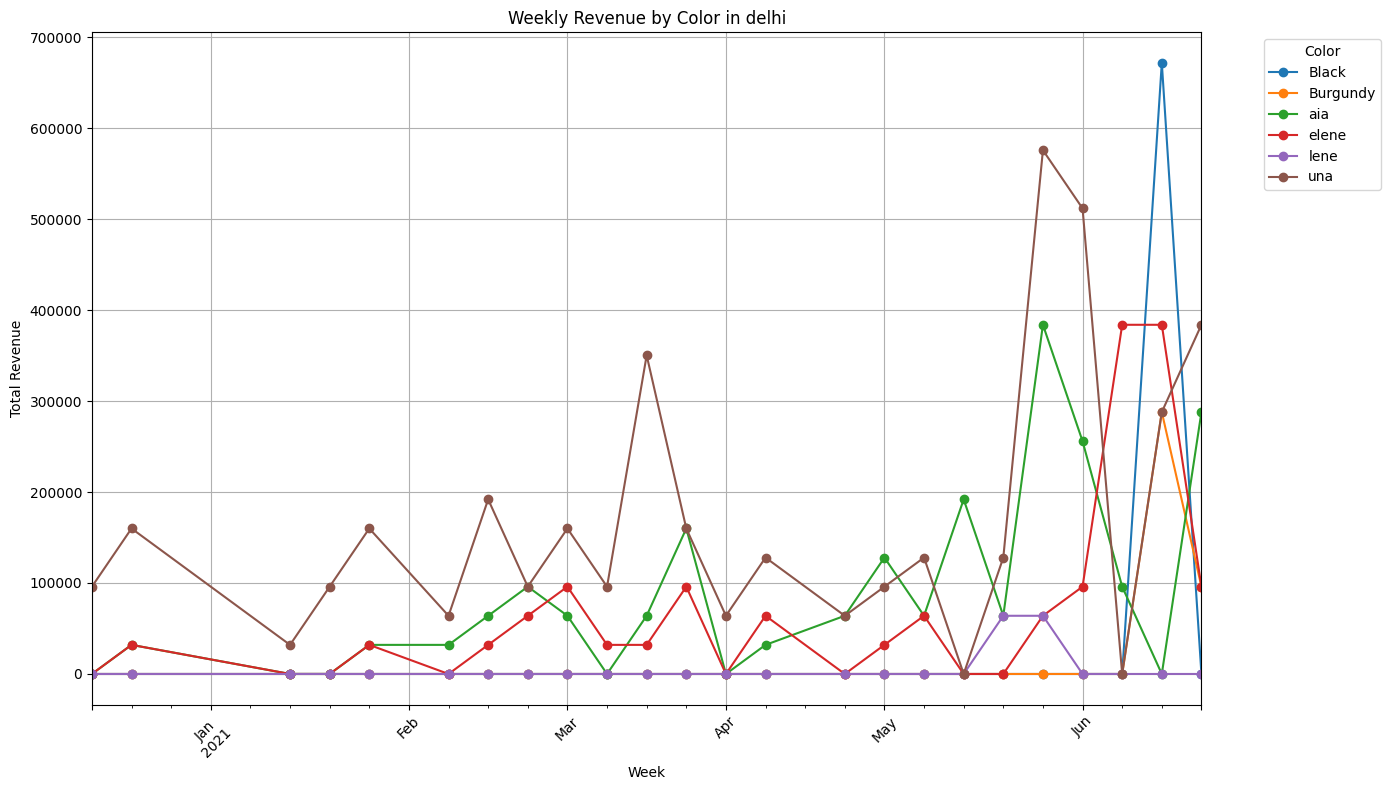

<Figure size 1400x800 with 0 Axes>

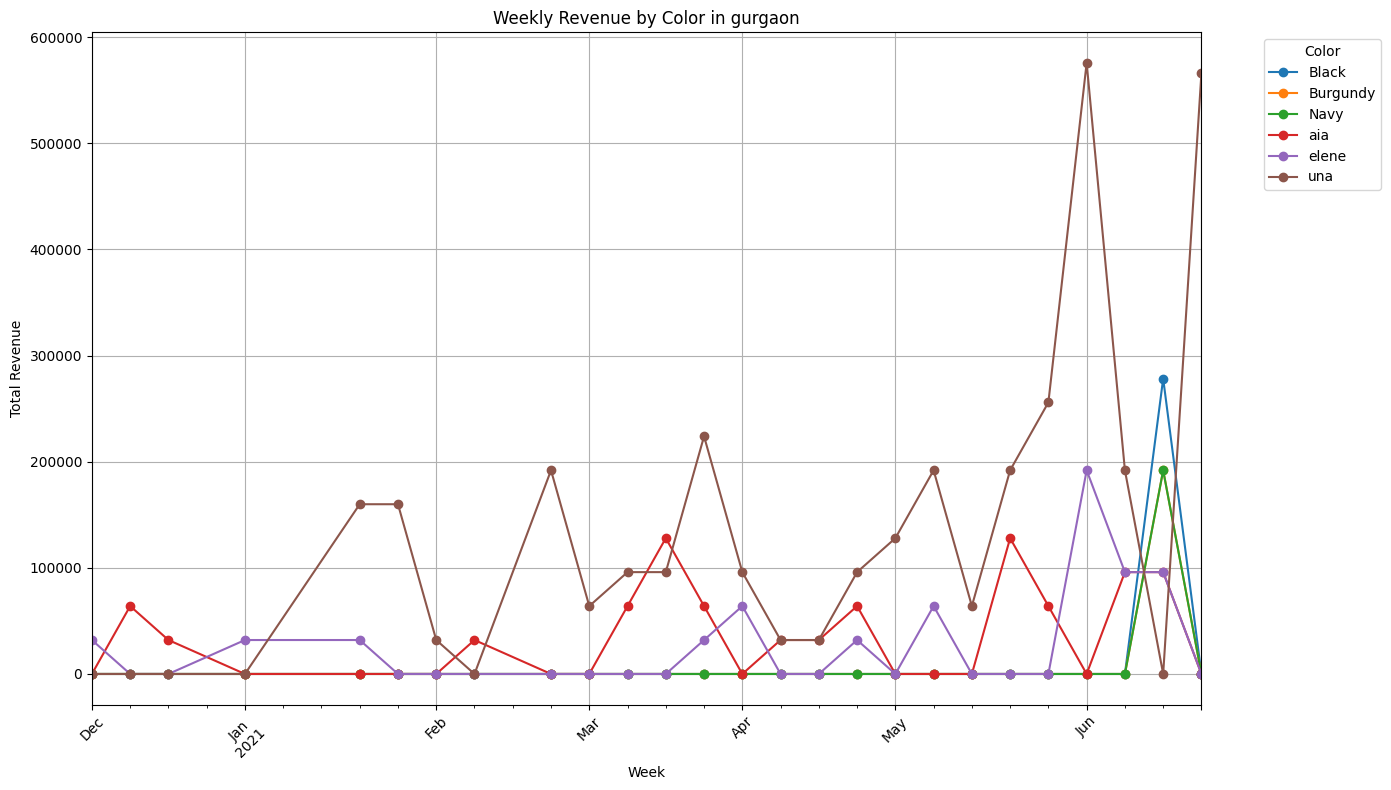

<Figure size 1400x800 with 0 Axes>

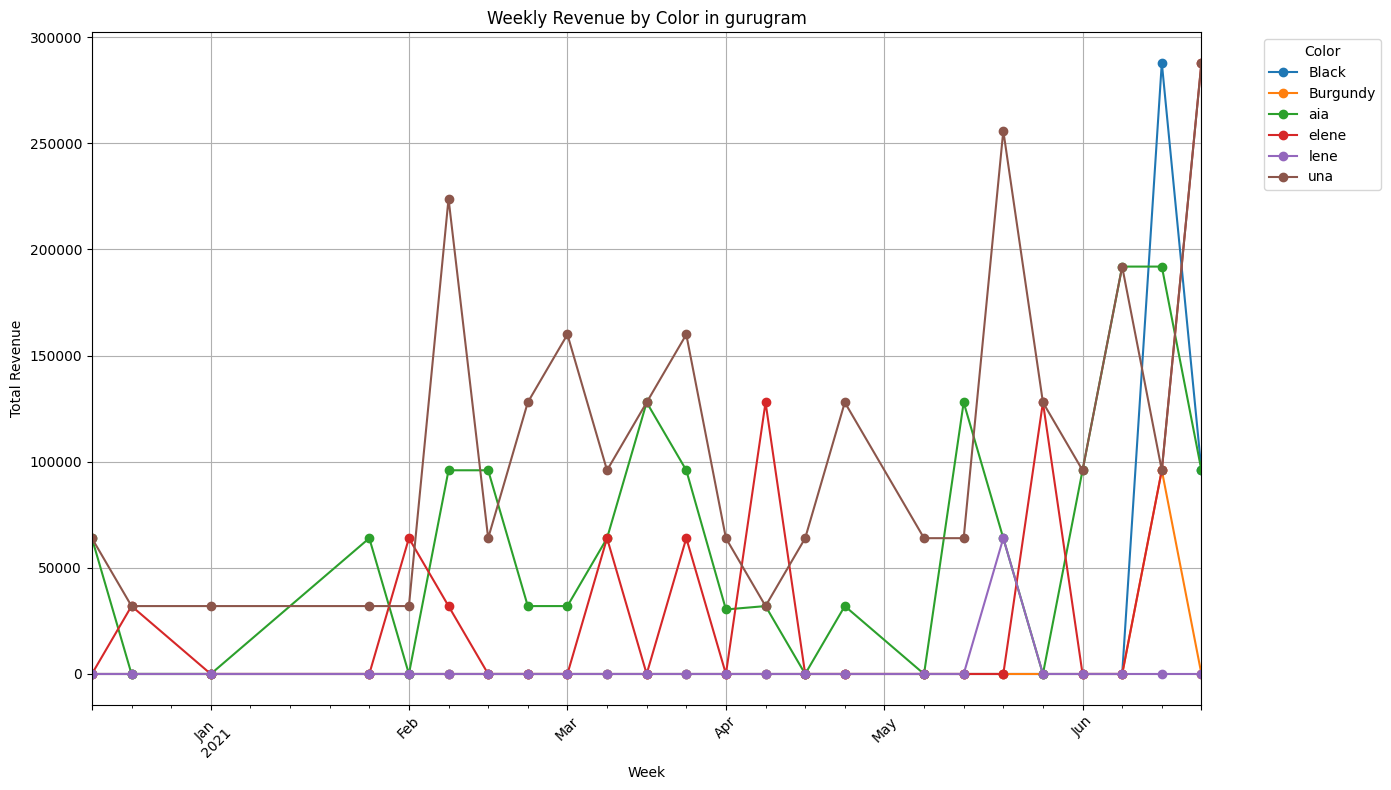

<Figure size 1400x800 with 0 Axes>

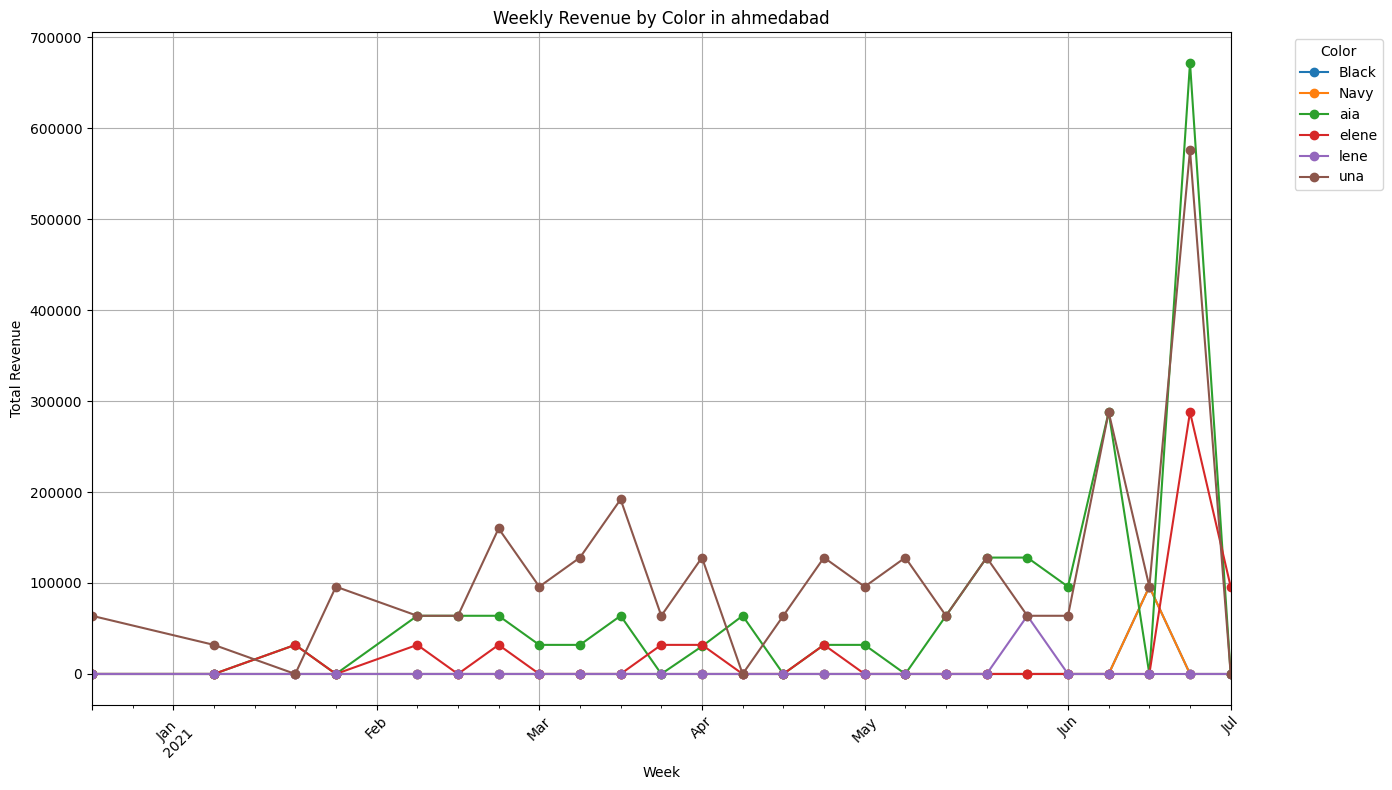

In [85]:
# Create a 'Week' column for weekly aggregation
test['Week'] = test.index.to_period('W')

# Group by week, size, color, and city to get weekly performance
weekly_performance = test.groupby(['Week', 'Size', 'Color', 'Shipping City'])['Total'].agg('sum').reset_index()

# Find top-selling cities based on total revenue (sum of 'total')
top_cities = weekly_performance.groupby('Shipping City')['Total'].sum().sort_values(ascending=False).head(10).index

# Filter the data to include only top-selling cities
top_city_data = weekly_performance[weekly_performance['Shipping City'].isin(top_cities)]

# Plot revenue by size for each top-selling city
for city in top_cities:
    city_data = top_city_data[top_city_data['Shipping City'] == city]
    
    # Pivot the table to have Size as columns and Week as rows
    pivot_size = city_data.pivot_table(index='Week', columns='Size', values='Total', aggfunc='sum', fill_value=0)
    
    # Plotting for Size
    plt.figure(figsize=(14, 8))
    pivot_size.plot(marker='o', linestyle='-', figsize=(14, 8))
    
    # Customize the plot for better readability
    plt.title(f'Weekly Revenue by Size in {city}')
    plt.xlabel('Week')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.legend(title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot revenue by color for each top-selling city
for city in top_cities:
    city_data = top_city_data[top_city_data['Shipping City'] == city]
    
    # Pivot the table to have Color as columns and Week as rows
    pivot_color = city_data.pivot_table(index='Week', columns='Color', values='Total', aggfunc='sum', fill_value=0)
    
    # Plotting for Color
    plt.figure(figsize=(14, 8))
    pivot_color.plot(marker='o', linestyle='-', figsize=(14, 8))
    
    # Customize the plot for better readability
    plt.title(f'Weekly Revenue by Color in {city}')
    plt.xlabel('Week')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

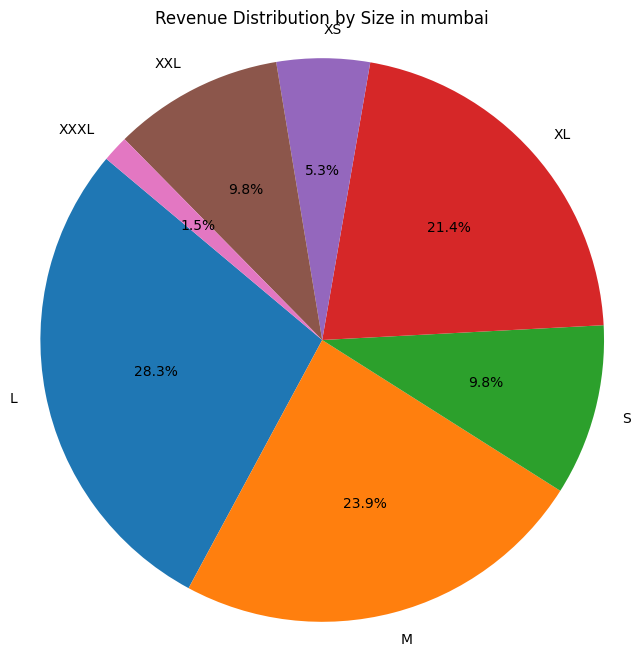

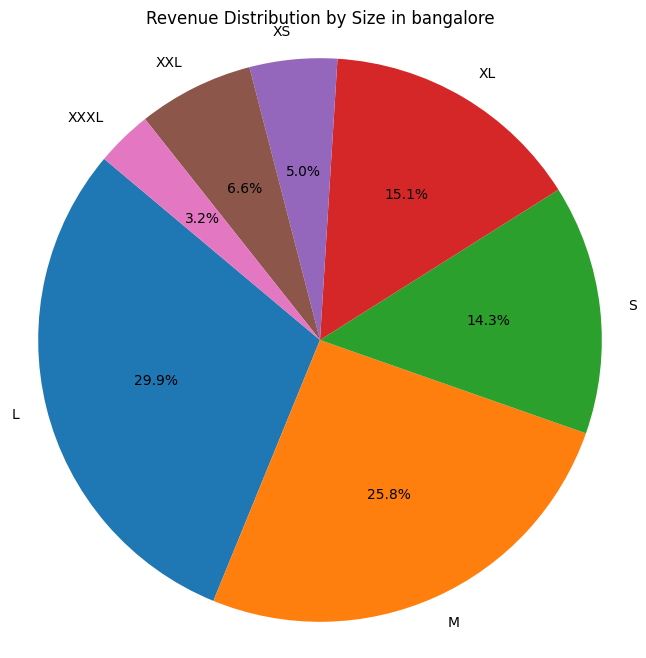

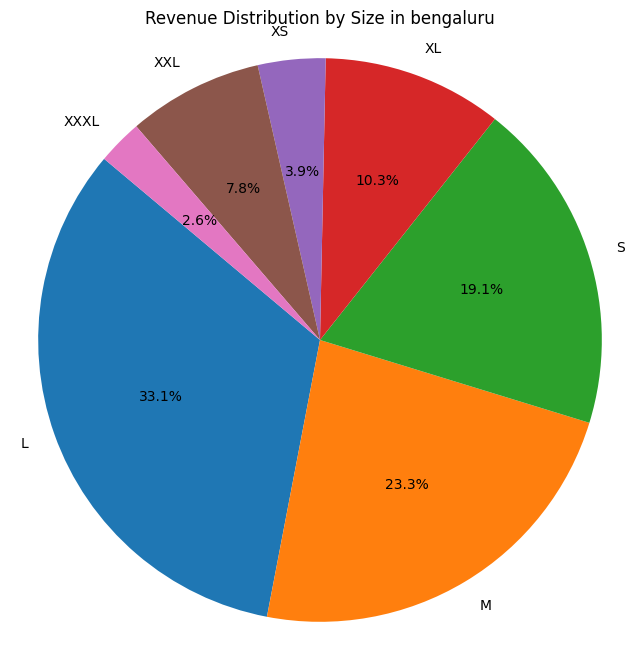

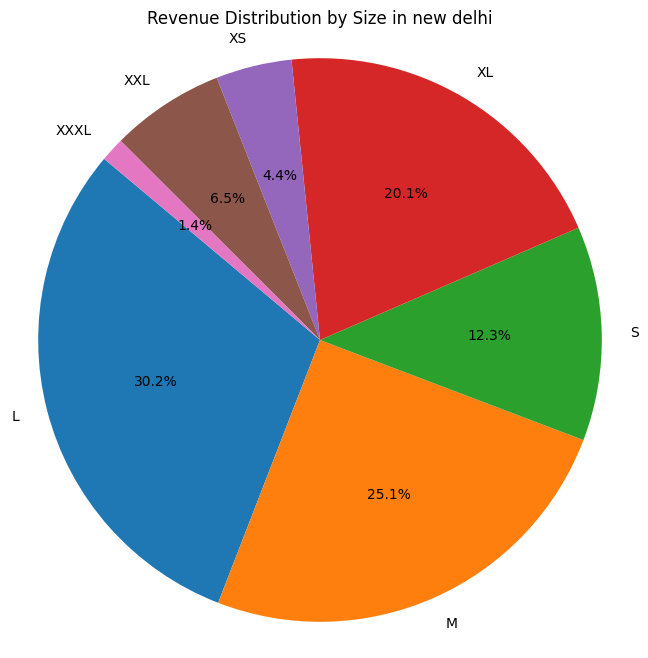

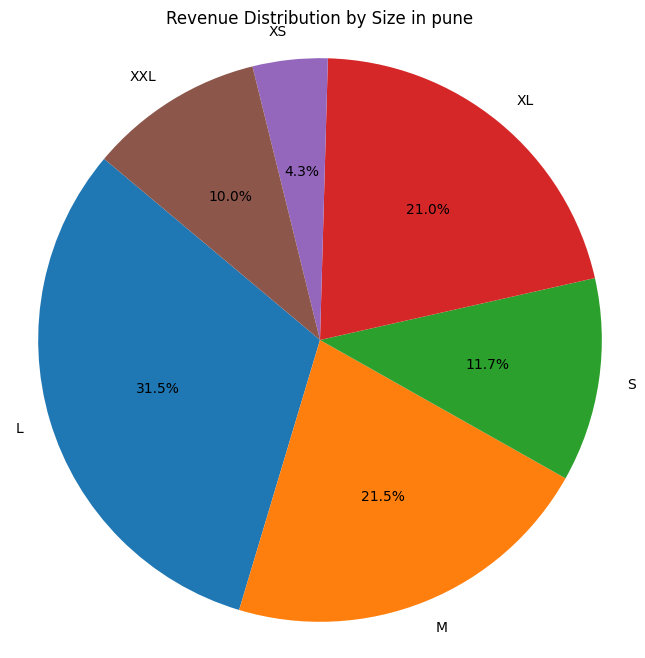

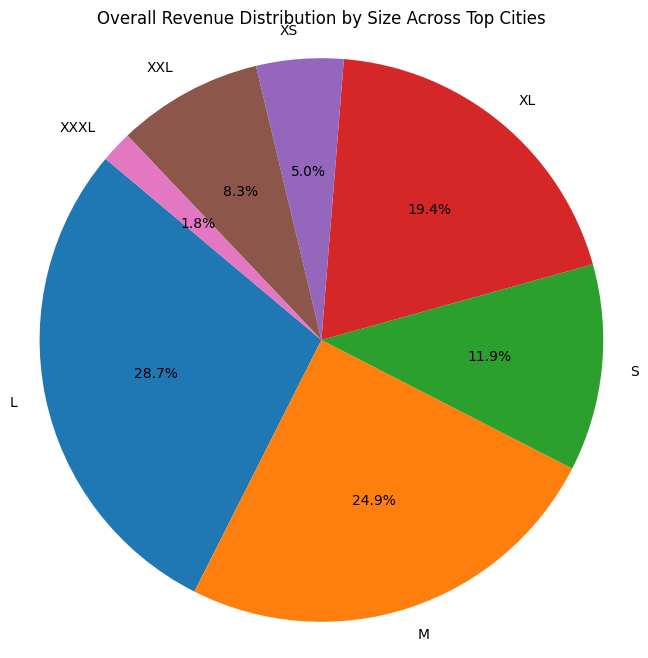

In [91]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Loop through each top-selling city to plot individual pie charts for Size
for city in top_cities:
    city_data = top_city_data[top_city_data['Shipping City'] == city]
    
    # Aggregate revenue by Size for the city
    size_distribution = city_data.groupby('Size')['Total'].sum()
    
    # Plot pie chart for Size distribution in the current city
    plt.figure(figsize=(8, 8))
    plt.pie(size_distribution, labels=size_distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Revenue Distribution by Size in {city}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()

# Combined pie chart for all top cities (aggregated revenue by Size)
combined_size_distribution = top_city_data.groupby('Size')['Total'].sum()

# Plot pie chart for combined Size distribution
plt.figure(figsize=(8, 8))
plt.pie(combined_size_distribution, labels=combined_size_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Revenue Distribution by Size Across Top Cities')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


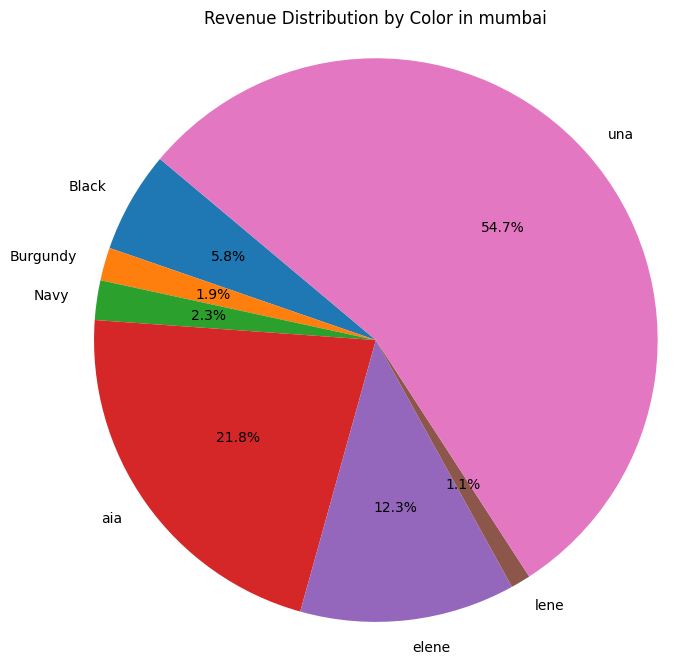

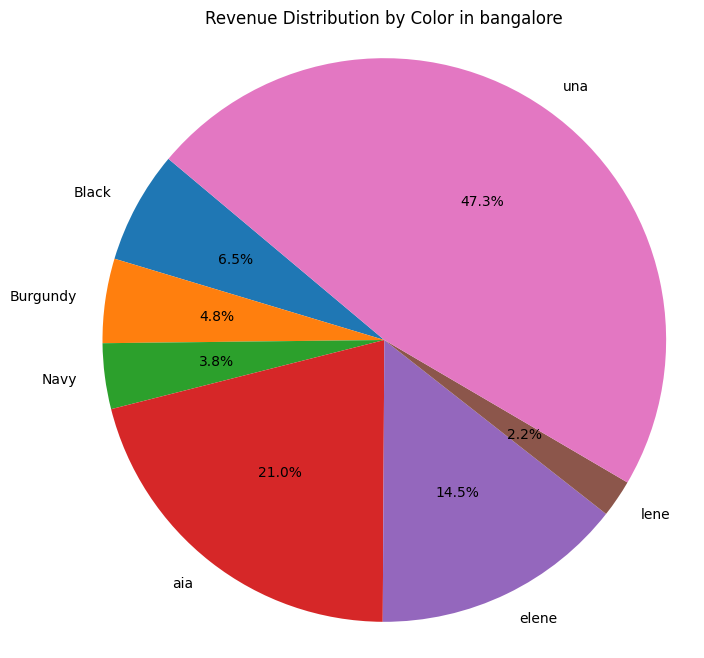

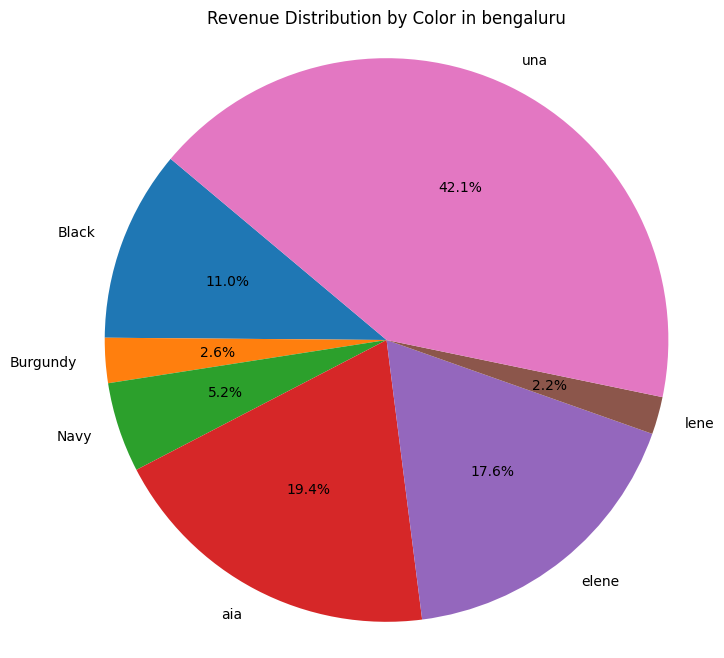

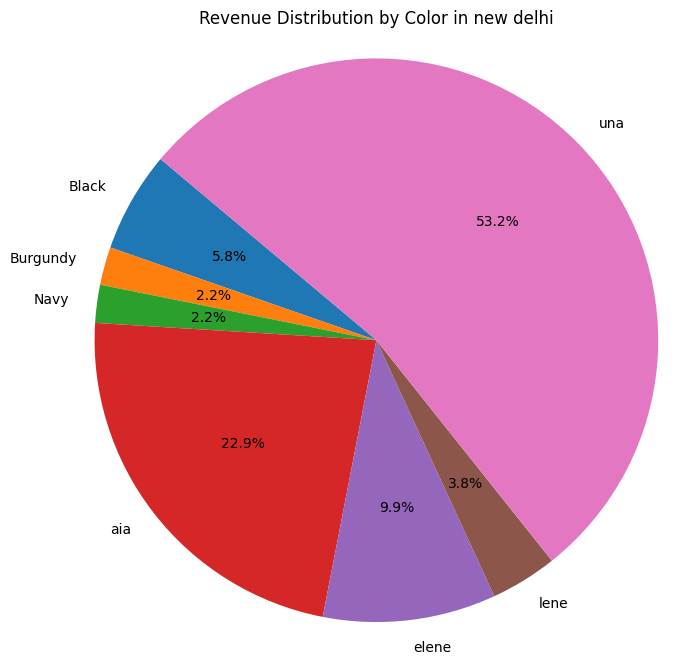

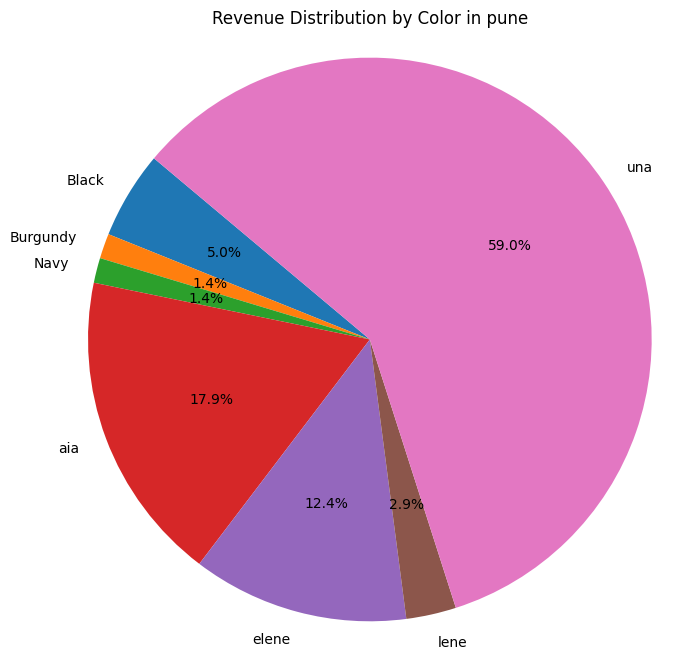

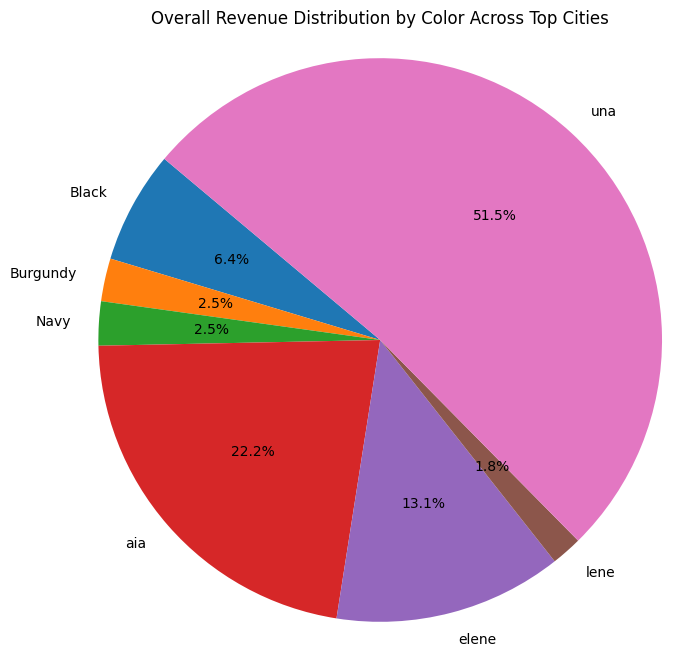

In [92]:
# Loop through each top-selling city to plot individual pie charts for Color
for city in top_cities:
    city_data = top_city_data[top_city_data['Shipping City'] == city]
    
    # Aggregate revenue by Color for the city
    color_distribution = city_data.groupby('Color')['Total'].sum()
    
    # Plot pie chart for Color distribution in the current city
    plt.figure(figsize=(8, 8))
    plt.pie(color_distribution, labels=color_distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Revenue Distribution by Color in {city}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()

# Combined pie chart for all top cities (aggregated revenue by Color)
combined_color_distribution = top_city_data.groupby('Color')['Total'].sum()

# Plot pie chart for combined Color distribution
plt.figure(figsize=(8, 8))
plt.pie(combined_color_distribution, labels=combined_color_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Revenue Distribution by Color Across Top Cities')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


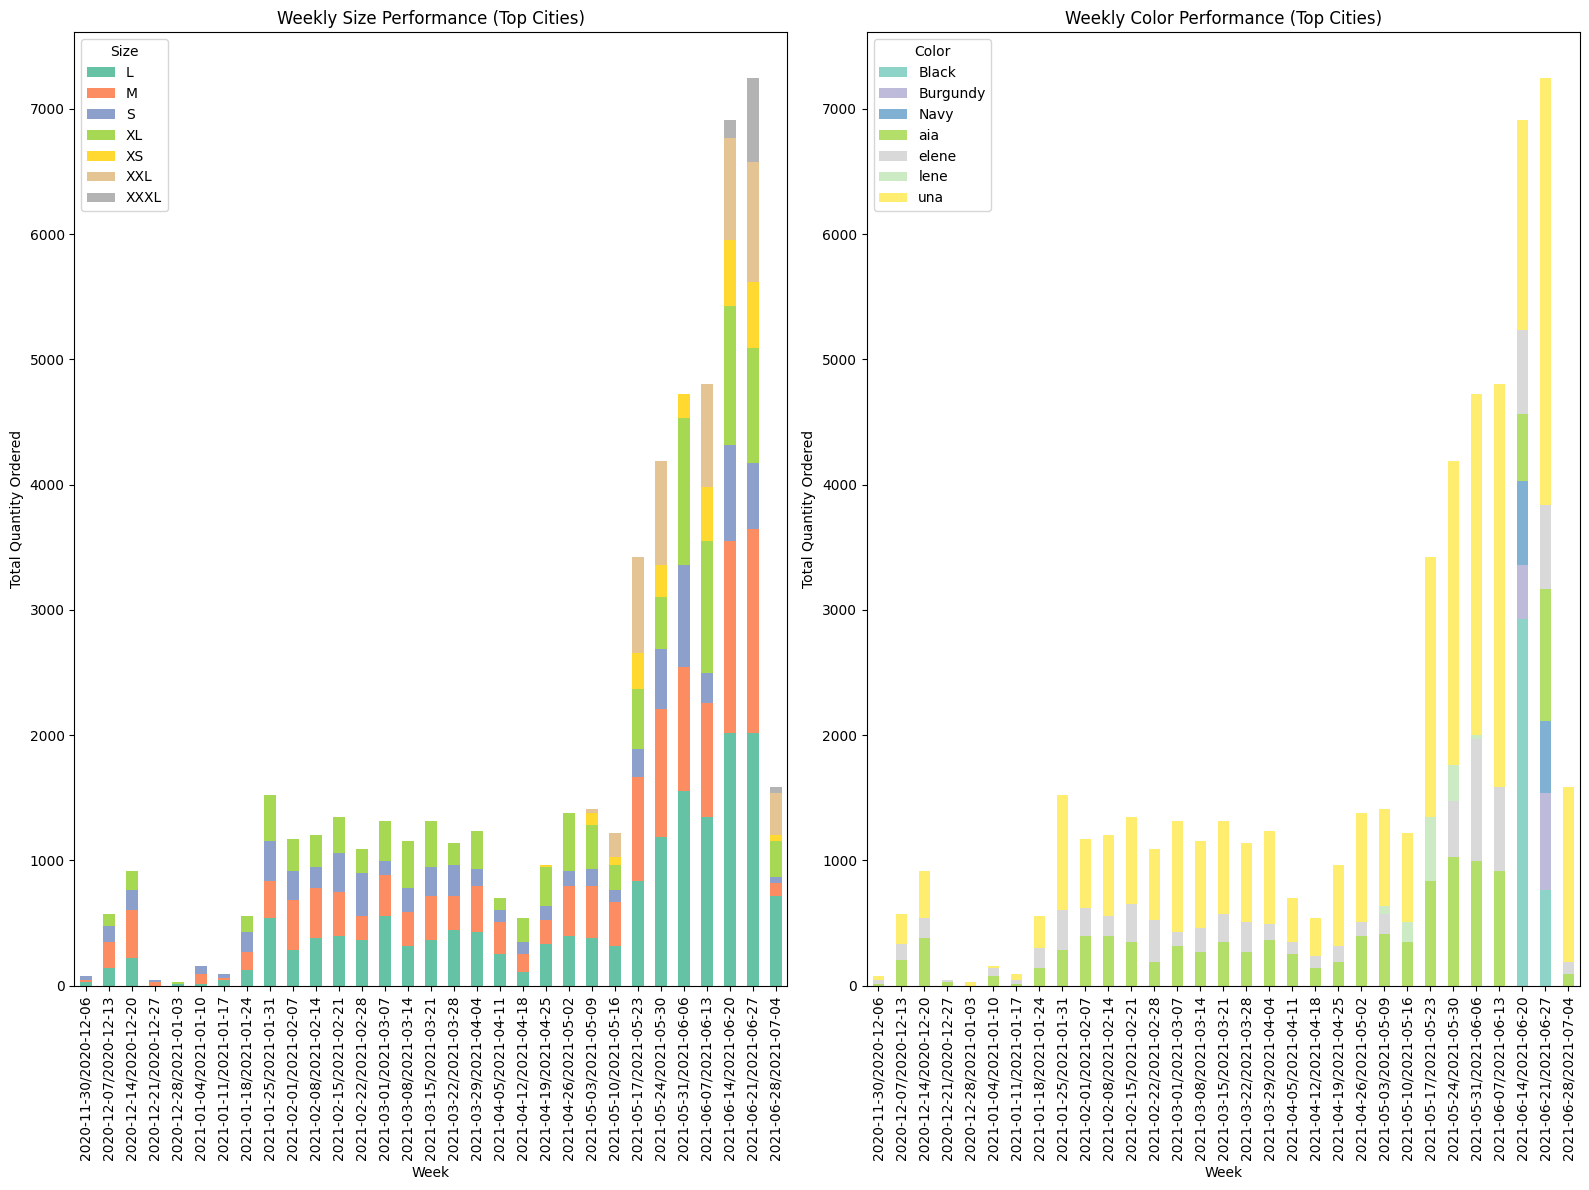

In [88]:

# Group data by week, size, color, and city
test['Week'] = test.index.to_period('W')  # Add a week column for weekly analysis
weekly_performance_size = test.groupby(['Week', 'Shipping City', 'Size'])['Lineitem quantity'].sum().reset_index()
weekly_performance_color = test.groupby(['Week', 'Shipping City', 'Color'])['Lineitem quantity'].sum().reset_index()

# Identify top-performing cities based on total quantity ordered
top_cities = test.groupby('Shipping City')['Lineitem quantity'].sum().nlargest(5).index

# Filter data for top-performing cities
top_cities_size = weekly_performance_size[weekly_performance_size['Shipping City'].isin(top_cities)]
top_cities_color = weekly_performance_color[weekly_performance_color['Shipping City'].isin(top_cities)]

# Create subplots with a 2x2 grid (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 12))  # Change this to (2, 2) if you want a 2x2 grid

# Plot 3: Stacked bar chart by size (weekly performance)
pivot_size = top_cities_size.pivot_table(index='Week', columns='Size', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly size performance
pivot_size.plot(kind='bar', stacked=True, ax=axes[0], cmap='Set2')
axes[0].set_title('Weekly Size Performance (Top Cities)')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Total Quantity Ordered')
axes[0].legend(title='Size')

# Plot 4: Stacked bar chart by color (weekly performance)
pivot_color = top_cities_color.pivot_table(index='Week', columns='Color', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly color performance
pivot_color.plot(kind='bar', stacked=True, ax=axes[1], cmap='Set3')
axes[1].set_title('Weekly Color Performance (Top Cities)')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Total Quantity Ordered')
axes[1].legend(title='Color')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

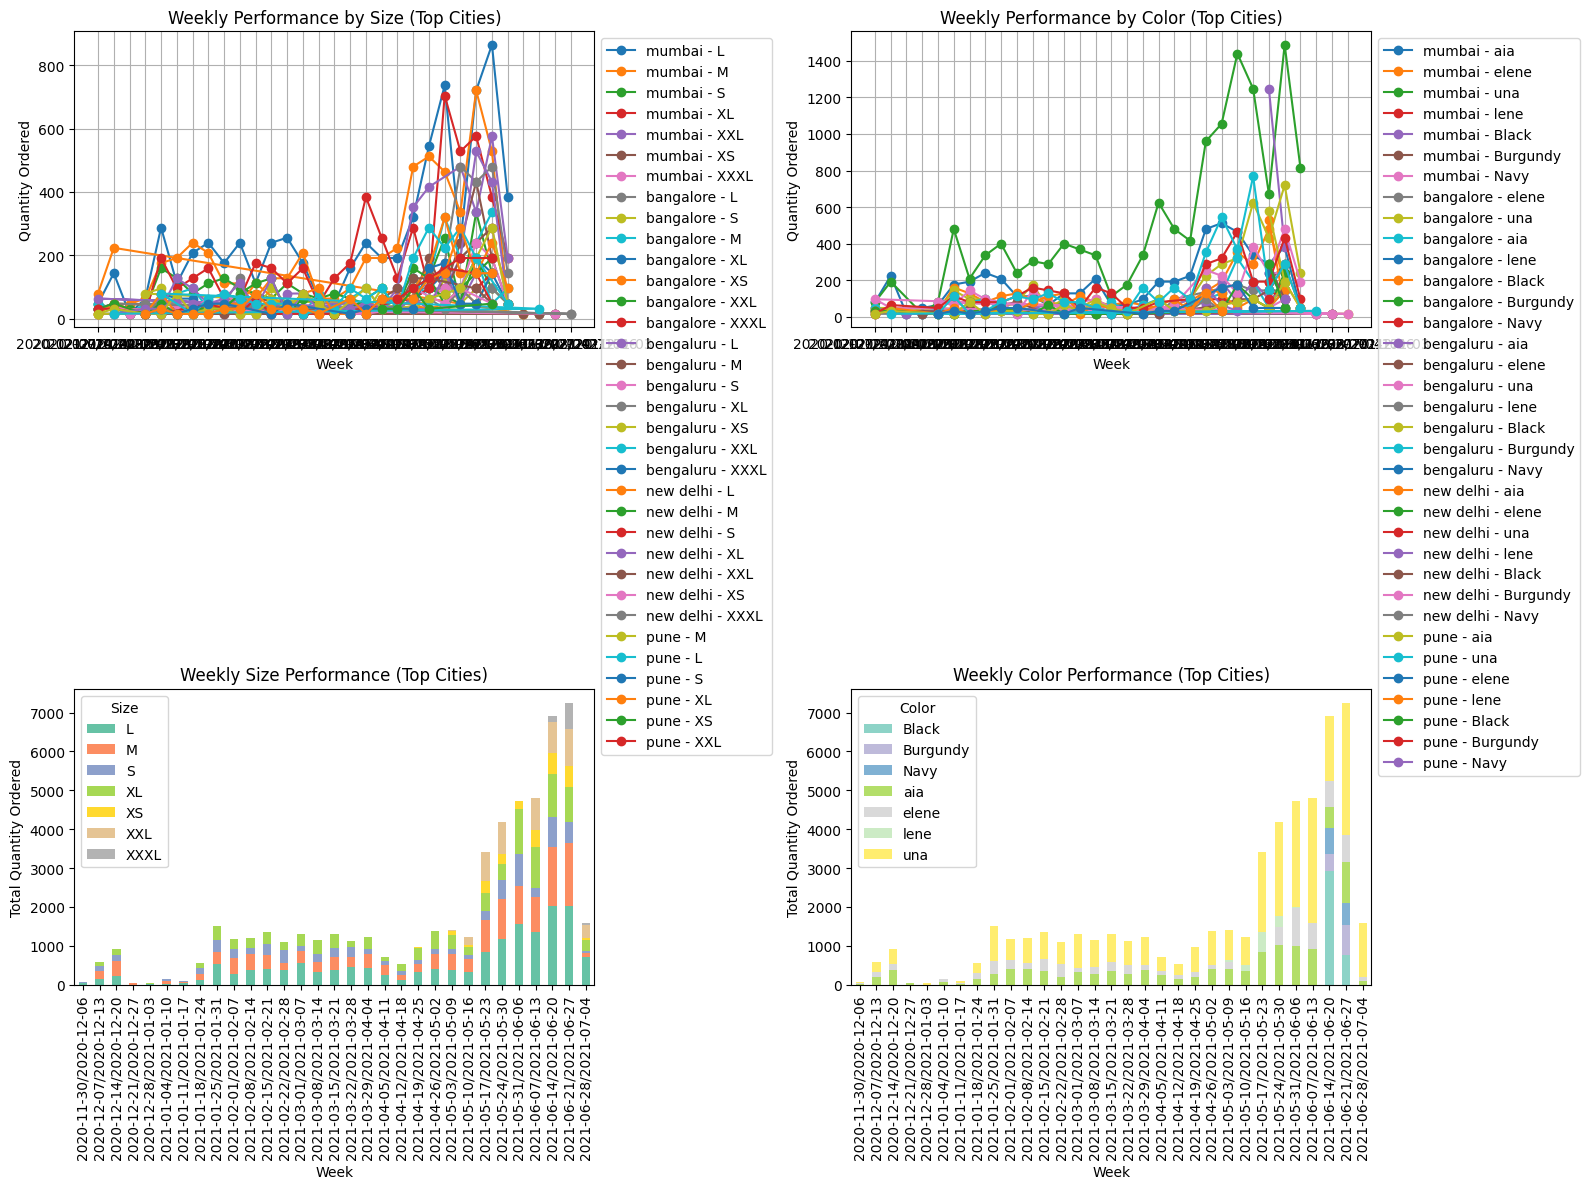

In [89]:


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Weekly performance by size (line chart)
for city in top_cities:
    city_data = top_cities_size[top_cities_size['Shipping City'] == city]
    for size in city_data['Size'].unique():
        size_data = city_data[city_data['Size'] == size]
        axes[0, 0].plot(size_data['Week'].astype(str), size_data['Lineitem quantity'], label=f'{city} - {size}', marker='o')
axes[0, 0].set_title('Weekly Performance by Size (Top Cities)')
axes[0, 0].set_xlabel('Week')
axes[0, 0].set_ylabel('Quantity Ordered')
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0, 0].grid(True)

# Plot 2: Weekly performance by color (line chart)
for city in top_cities:
    city_data = top_cities_color[top_cities_color['Shipping City'] == city]
    for color in city_data['Color'].unique():
        color_data = city_data[city_data['Color'] == color]
        axes[0, 1].plot(color_data['Week'].astype(str), color_data['Lineitem quantity'], label=f'{city} - {color}', marker='o')
axes[0, 1].set_title('Weekly Performance by Color (Top Cities)')
axes[0, 1].set_xlabel('Week')
axes[0, 1].set_ylabel('Quantity Ordered')
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0, 1].grid(True)

# Plot 3: Stacked bar chart by size (weekly performance)
pivot_size = top_cities_size.pivot_table(index='Week', columns='Size', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly size performance
pivot_size.plot(kind='bar', stacked=True, ax=axes[1, 0], cmap='Set2')
axes[1, 0].set_title('Weekly Size Performance (Top Cities)')
axes[1, 0].set_xlabel('Week')
axes[1, 0].set_ylabel('Total Quantity Ordered')
axes[1, 0].legend(title='Size')

# Plot 4: Stacked bar chart by color (weekly performance)
pivot_color = top_cities_color.pivot_table(index='Week', columns='Color', values='Lineitem quantity', aggfunc='sum')

# Plot stacked bar chart for weekly color performance
pivot_color.plot(kind='bar', stacked=True, ax=axes[1, 1], cmap='Set3')
axes[1, 1].set_title('Weekly Color Performance (Top Cities)')
axes[1, 1].set_xlabel('Week')
axes[1, 1].set_ylabel('Total Quantity Ordered')
axes[1, 1].legend(title='Color')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
